In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Подготовка датасетов (отсеивание остатков)

In [3]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0      0.043496    0.041205    0.043296    0.049496    0.018957    0.020623   
1      0.047268    0.046536    0.044069    0.050039    0.019246    0.021221   
2      0.044126    0.044443    0.036774    0.041407    0.010971    0.014720   
3      0.062028    0.062371    0.050494    0.054275    0.025246    0.029794   
4      0.071914    0.072430    0.058286    0.061006    0.027560    0.035322   
..          ...         ...         ...         ...         ...         ...   
360    0.045611    0.054914    0.059584    0.077185    0.028578    0.029135   
361    0.040227    0.046561    0.047235    0.068944    0.020274    0.021585   
362    0.036336    0.040292    0.039558    0.064122    0.014276    0.015902   
363    0.032965    0.035805    0.034460    0.062205    0.009790    0.011852   
364    0.031678    0.033542    0.031623    0.061194    0.008079    0.010965   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0      0.043043    0.037323    0.030662    0.021557  ...    -0.006893   
1      0.045237    0.040602    0.034548    0.025336  ...     0.000493   
2      0.043880    0.036382    0.029206    0.017985  ...    -0.004167   
3      0.058684    0.048697    0.041713    0.030885  ...    -0.010836   
4      0.063933    0.056161    0.049207    0.039845  ...    -0.000004   
..          ...         ...         ...         ...  ...          ...   
360    0.054378    0.072661    0.074267    0.059977  ...     0.111664   
361    0.049065    0.066814    0.069268    0.056660  ...     0.103190   
362    0.045349    0.060325    0.064344    0.053484  ...     0.099011   
363    0.042518    0.053357    0.060313    0.050977  ...     0.098158   
364    0.040451    0.046910    0.057708    0.049543  ...     0.096756   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.016234    -0.021648    -0.021540     0.006230     0.002845   
1      -0.009252    -0.014643    -0.014258     0.013718     0.008249   
2      -0.012748    -0.017804    -0.017722     0.007621    -0.002128   
3      -0.015992    -0.018431    -0.017348    -0.000368    -0.010376   
4      -0.003843    -0.003772    -0.002390     0.010757     0.006049   
..           ...          ...          ...          ...          ...   
360     0.117896     0.114245     0.115759     0.105825     0.109763   
361     0.108623     0.107286     0.109981     0.097514     0.100478   
362     0.102547     0.102639     0.105849     0.095617     0.095864   
363     0.100042     0.100620     0.103715     0.097523     0.095937   
364     0.095937     0.094964     0.096638     0.098726     0.096455   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.005700    -0.013671     0.009085 2002-01-01  
1       0.000039    -0.006766     0.014637 2002-01-02  
2      -0.008281    -0.012912     0.003973 2002-01-03  
3      -0.011623    -0.014038     0.001755 2002-01-04  
4       0.003313    -0.000569     0.019566 2002-01-05  
..           ...          ...          ...        ...  
360     0.112713     0.115663     0.101524 2002-12-27  
361     0.104291     0.107933     0.094374 2002-12-28  
362     0.098940     0.101429     0.090882 2002-12-29  
363     0.098053     0.098531     0.092439 2002-12-30  
364     0.095877     0.092865     0.094673 2002-12-31  

[365 rows x 278 columns]

In [4]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0      0.034992    0.034718    0.032032    0.027844    0.026310    0.028339   
1      0.058270    0.058306    0.055602    0.050686    0.049921    0.051845   
2      0.062436    0.062537    0.059925    0.055279    0.054040    0.055957   
3      0.063424    0.063512    0.061063    0.056140    0.054533    0.056757   
4      0.056305    0.056191    0.053409    0.047372    0.047233    0.049387   
..          ...         ...         ...         ...         ...         ...   
360    0.053847    0.047681    0.039707    0.041549    0.063631    0.066376   
361    0.056429    0.049822    0.040671    0.040778    0.063836    0.067421   
362    0.059627    0.053090    0.045162    0.045927    0.066616    0.070397   
363    0.066121    0.059172    0.051419    0.052143    0.075578    0.078953   
364    0.063762    0.056489    0.048829    0.048968    0.074870    0.078118   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0      0.027947    0.027634    0.026690    0.016180  ...    -0.020535   
1      0.052467    0.052148    0.051075    0.040347  ...     0.022316   
2      0.057700    0.057536    0.056527    0.046154  ...     0.012881   
3      0.059166    0.058829    0.057676    0.046912  ...    -0.017130   
4      0.050545    0.049952    0.048565    0.036534  ...     0.012275   
..          ...         ...         ...         ...  ...          ...   
360    0.062971    0.055390    0.049154    0.048711  ...     0.080870   
361    0.064336    0.056341    0.049220    0.048054  ...     0.059155   
362    0.067439    0.059568    0.052695    0.052243  ...     0.059734   
363    0.074769    0.066495    0.059423    0.059202  ...     0.067323   
364    0.073466    0.064834    0.057580    0.057303  ...     0.079710   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.027864    -0.034043    -0.034043     0.008050     0.000913   
1       0.014934     0.009822     0.009822     0.050113     0.046925   
2       0.001712    -0.008514    -0.008514     0.039593     0.032066   
3      -0.022521    -0.022301    -0.022301     0.002329    -0.001674   
4       0.009005     0.006407     0.006407     0.034164     0.037784   
..           ...          ...          ...          ...          ...   
360     0.076975     0.081327     0.081327     0.091999     0.084992   
361     0.056916     0.064658     0.064658     0.071171     0.066003   
362     0.057916     0.064062     0.064062     0.076493     0.074301   
363     0.065050     0.070196     0.070196     0.084828     0.082266   
364     0.077438     0.080678     0.080678     0.097847     0.095381   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.021561    -0.030222     0.001356 2002-01-01  
1       0.027756     0.020172     0.049706 2002-01-02  
2       0.008459    -0.002192     0.025435 2002-01-03  
3      -0.016318    -0.021154     0.004181 2002-01-04  
4       0.022573     0.016598     0.045194 2002-01-05  
..           ...          ...          ...        ...  
360     0.073588     0.072650     0.071904 2002-12-27  
361     0.055439     0.054380     0.060337 2002-12-28  
362     0.060417     0.056684     0.070495 2002-12-29  
363     0.066639     0.062536     0.074877 2002-12-30  
364     0.079860     0.075920     0.088263 2002-12-31  

[365 rows x 278 columns]

In [5]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

# Вывод всех графиков для первой точки

76.04_8.72
Test cell № 0


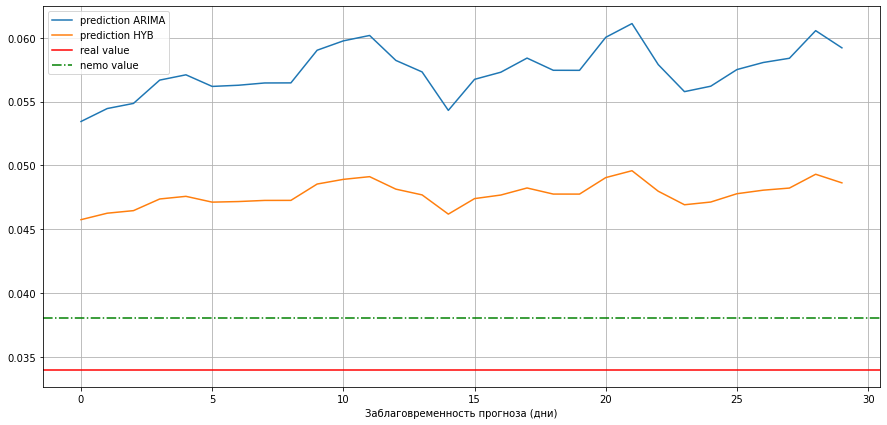

Test cell № 1


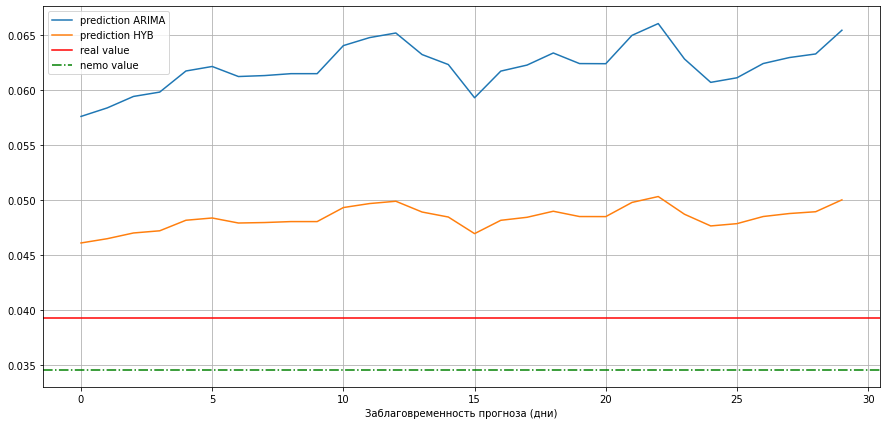

Test cell № 2


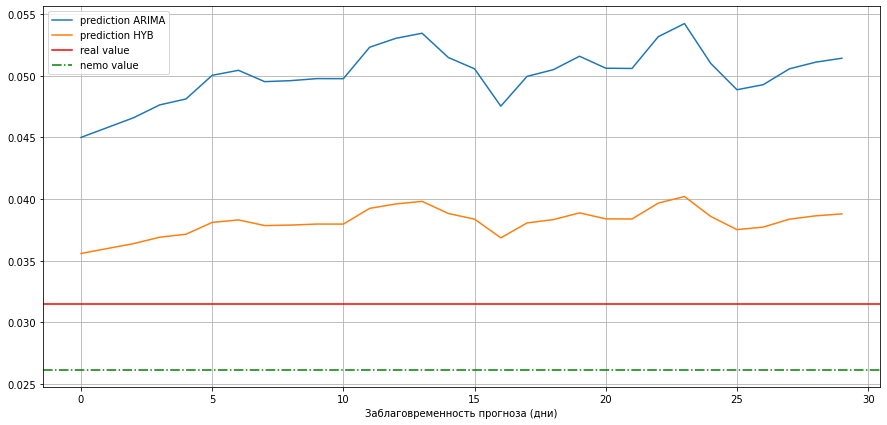

Test cell № 3


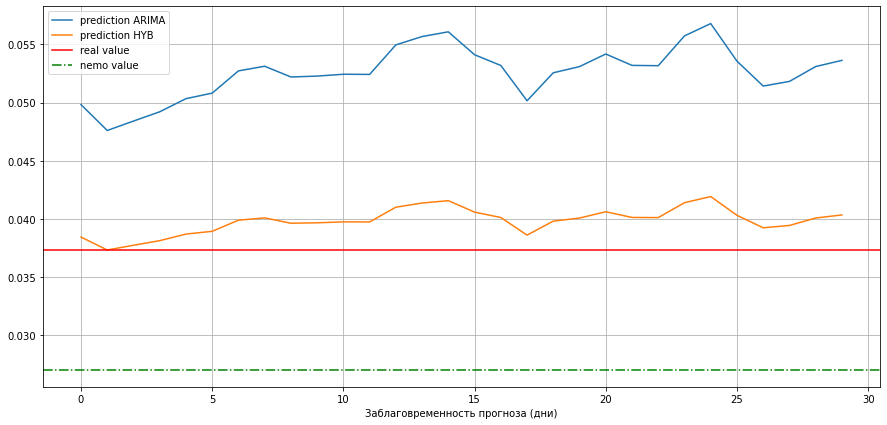

Test cell № 4


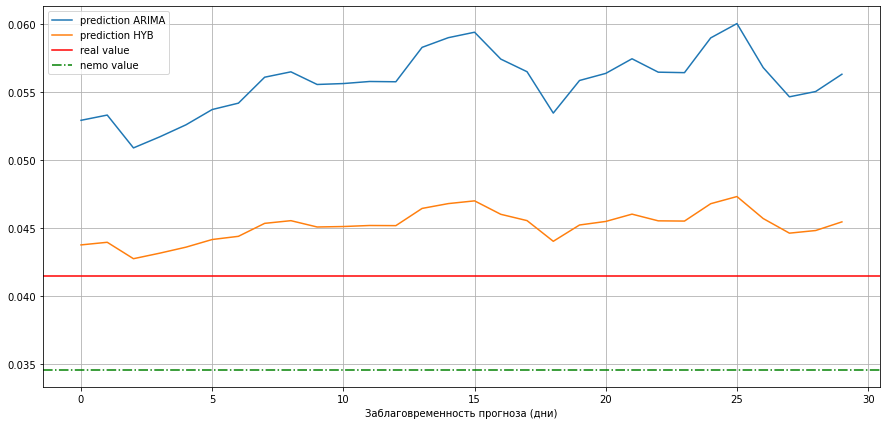

Test cell № 5


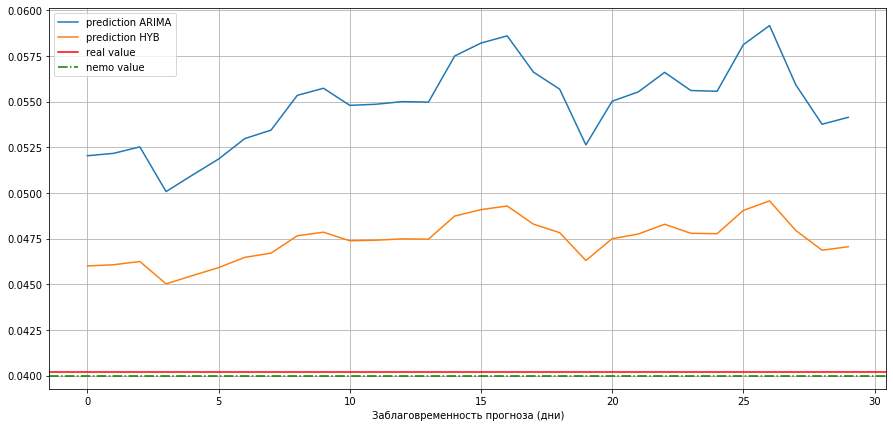

Test cell № 6


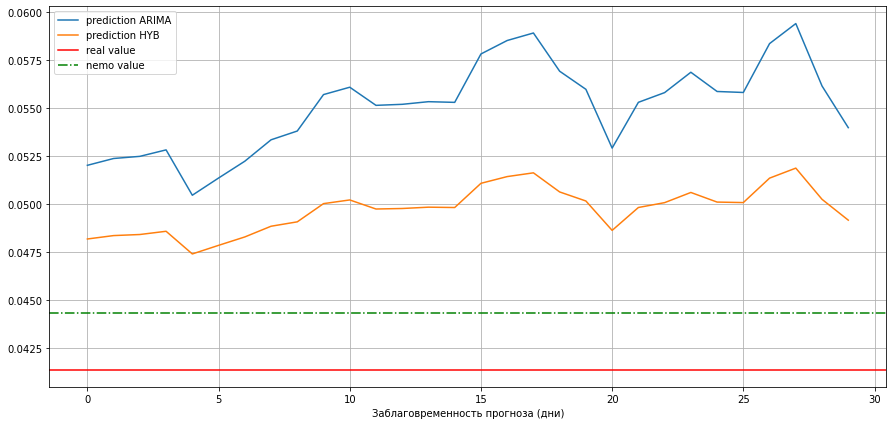

Test cell № 7


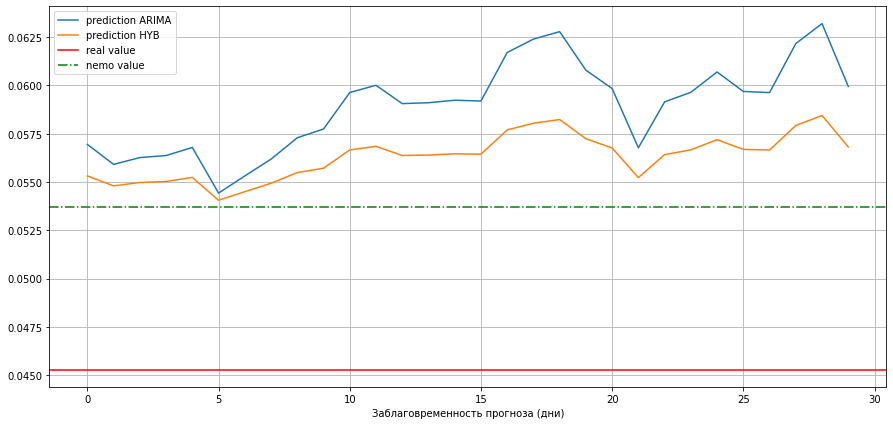

Test cell № 8


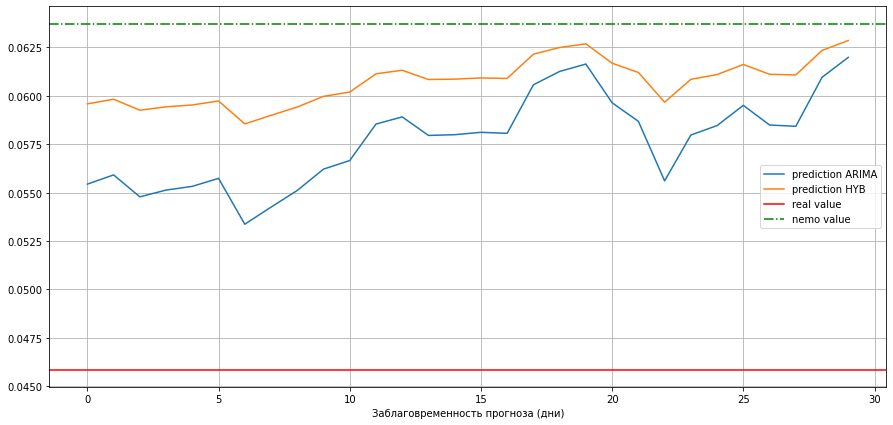

Test cell № 9


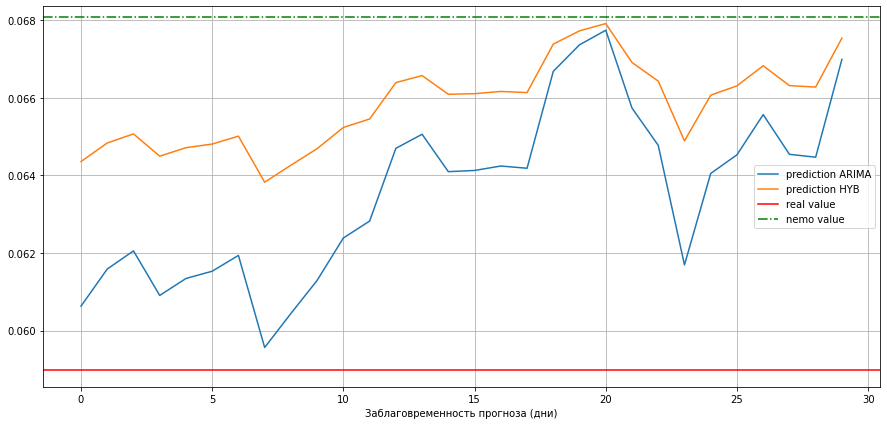

Test cell № 10


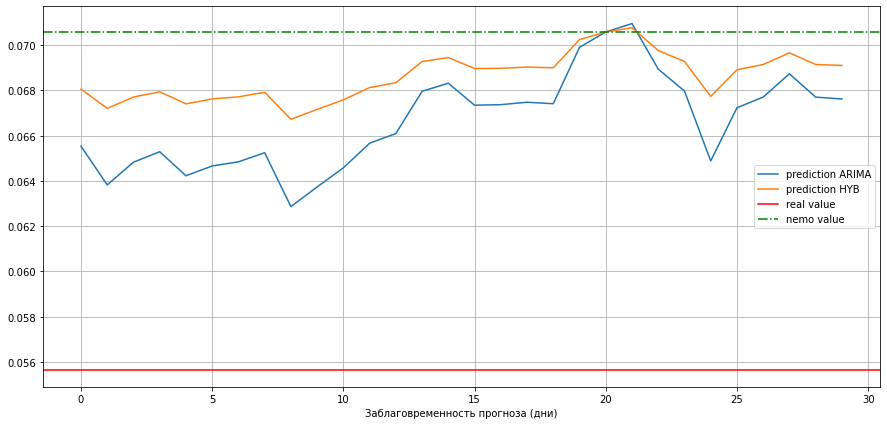

Test cell № 11


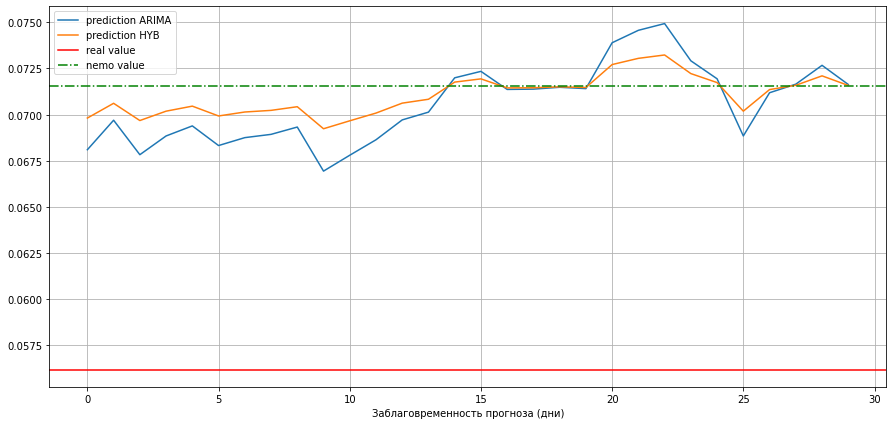

Test cell № 12


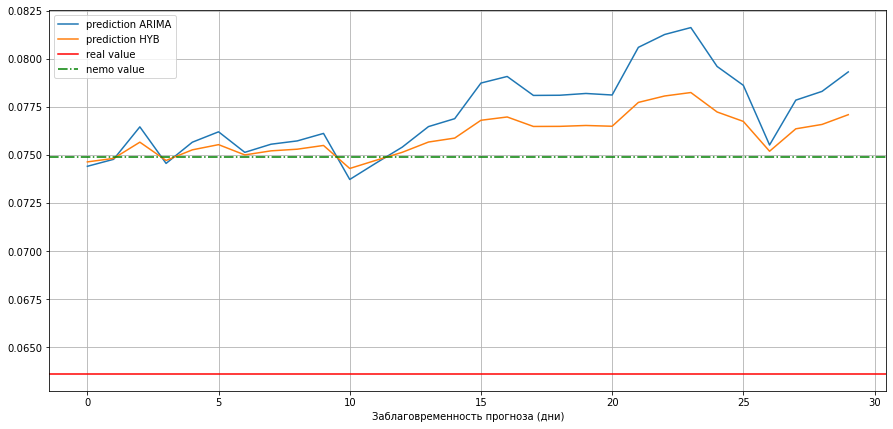

Test cell № 13


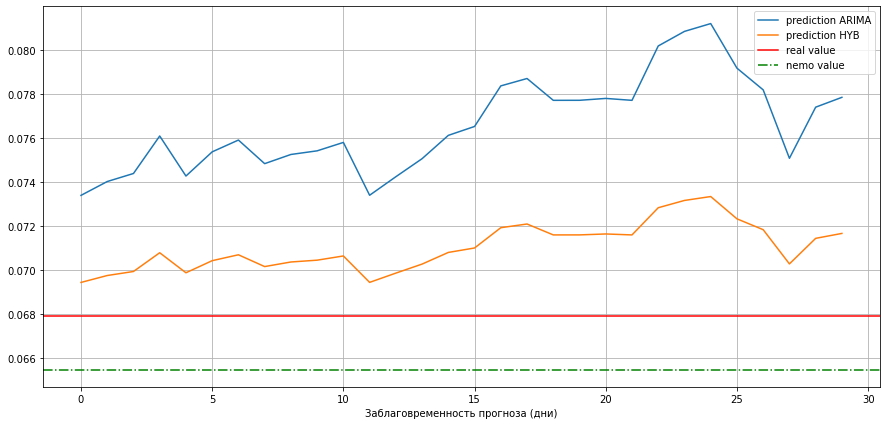

Test cell № 14


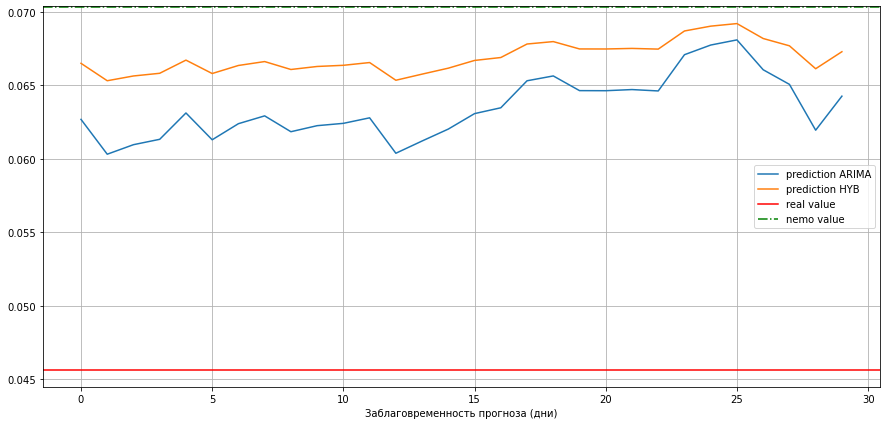

Test cell № 15


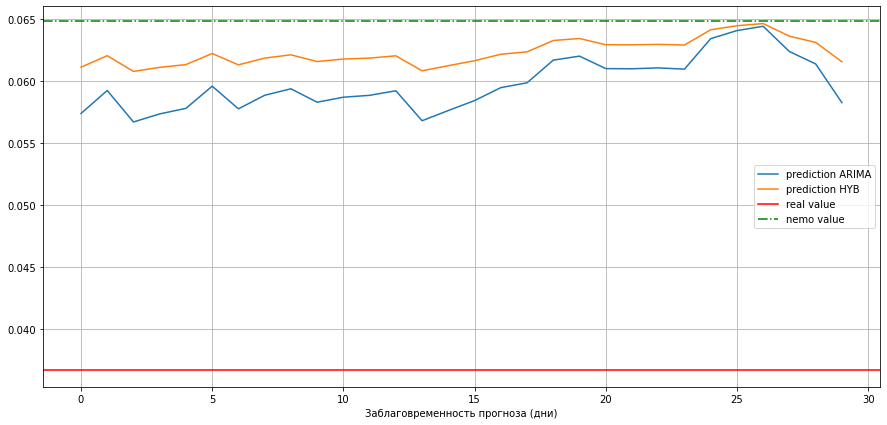

Test cell № 16


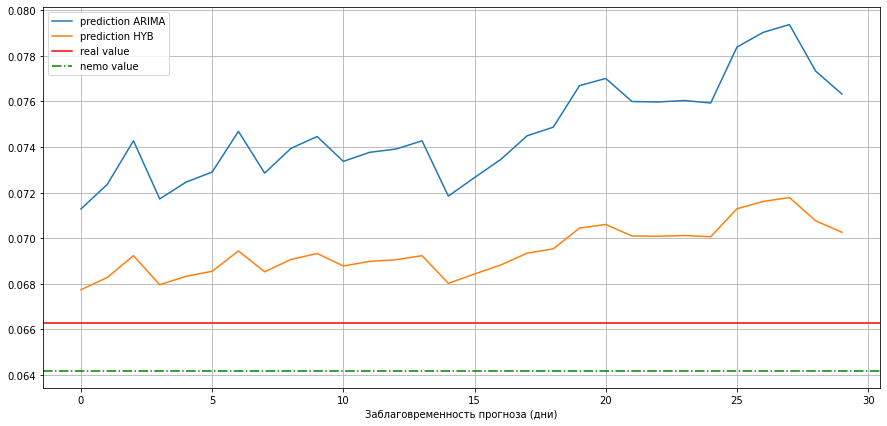

Test cell № 17


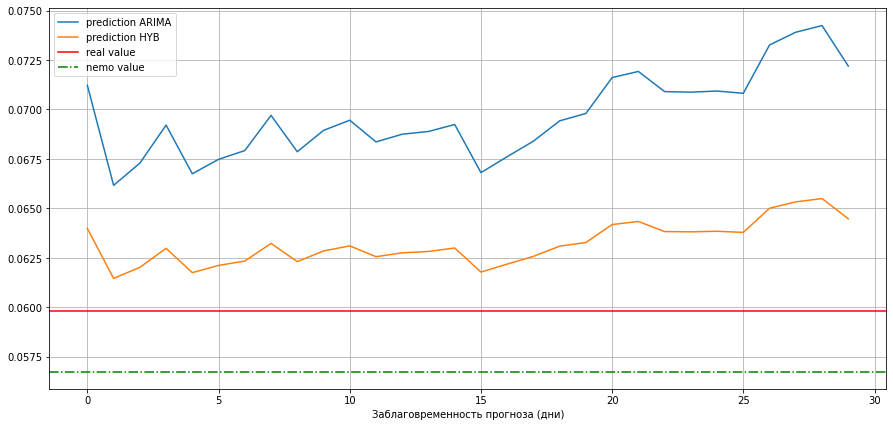

Test cell № 18


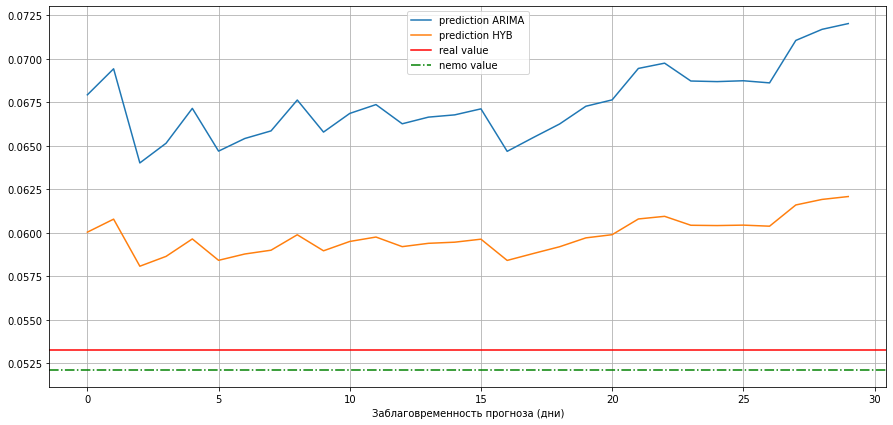

Test cell № 19


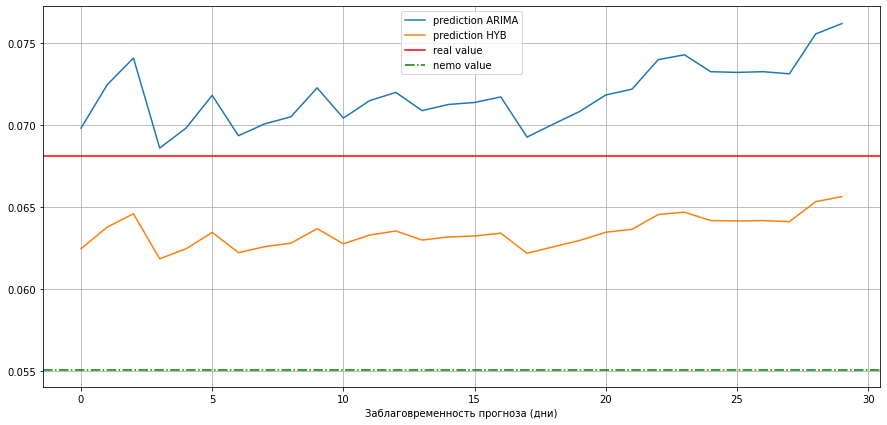

Test cell № 20


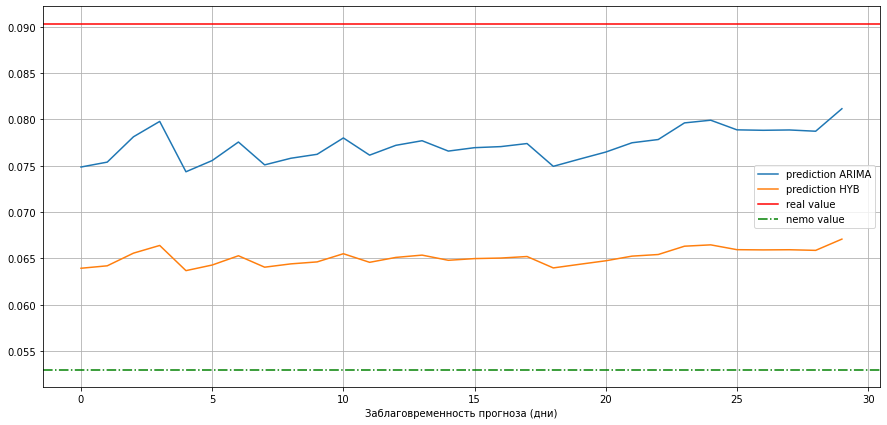

Test cell № 21


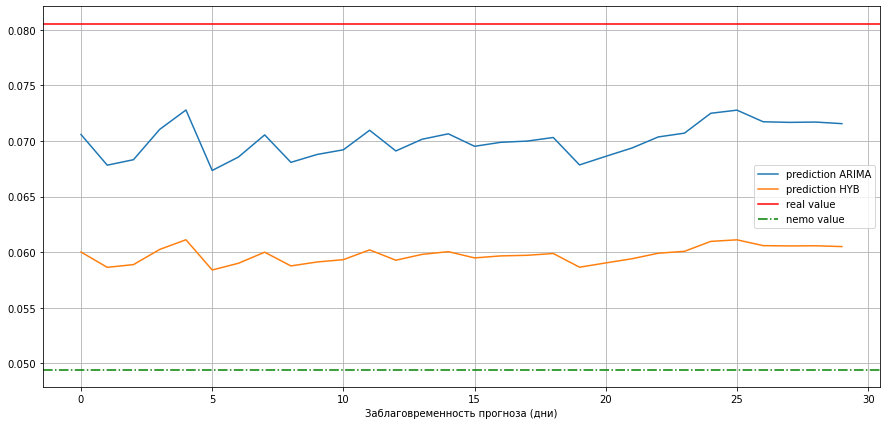

Test cell № 22


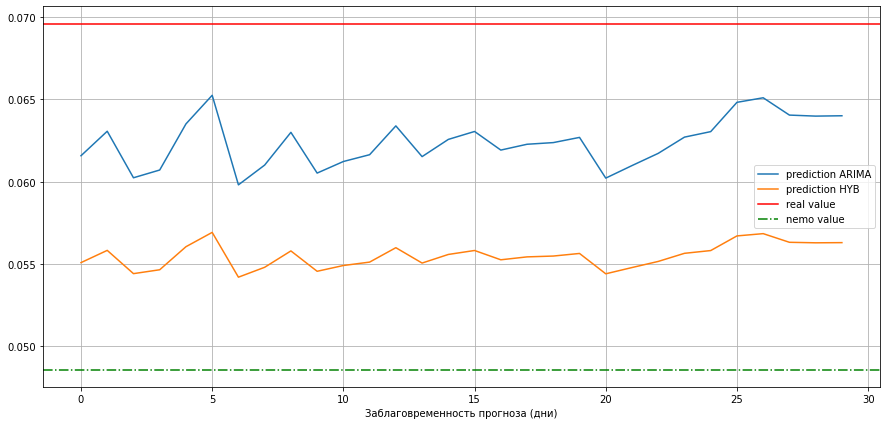

Test cell № 23


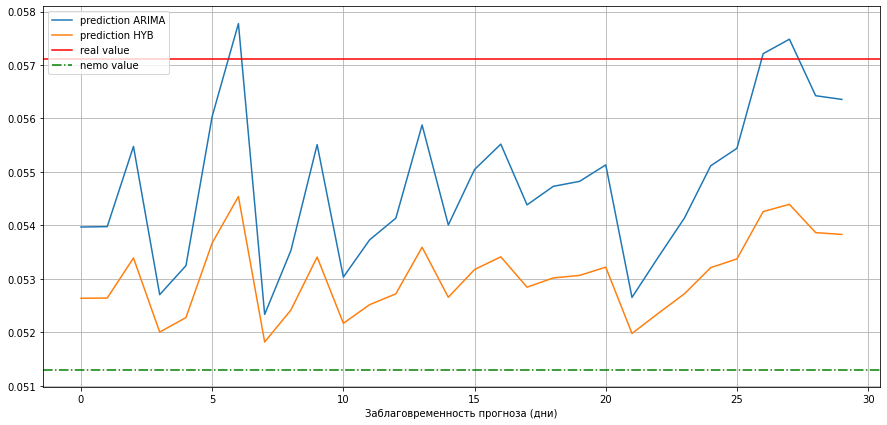

Test cell № 24


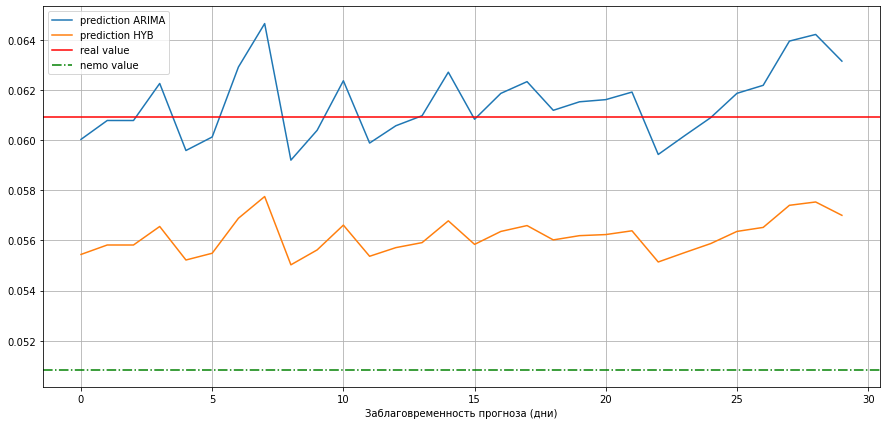

Test cell № 25


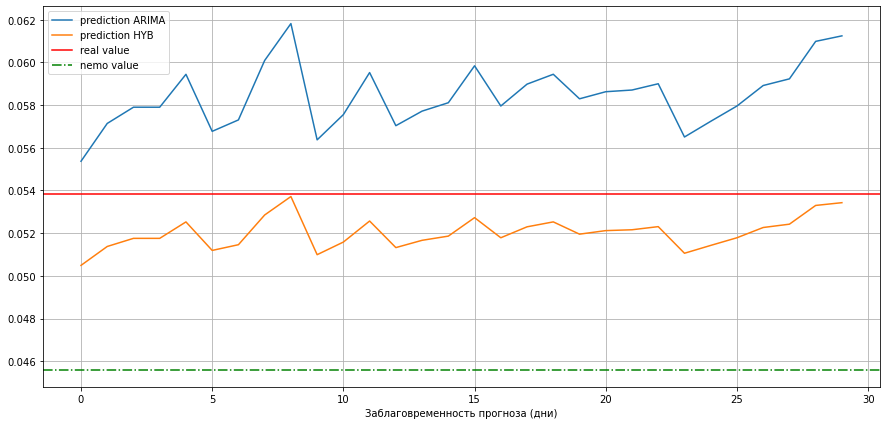

Test cell № 26


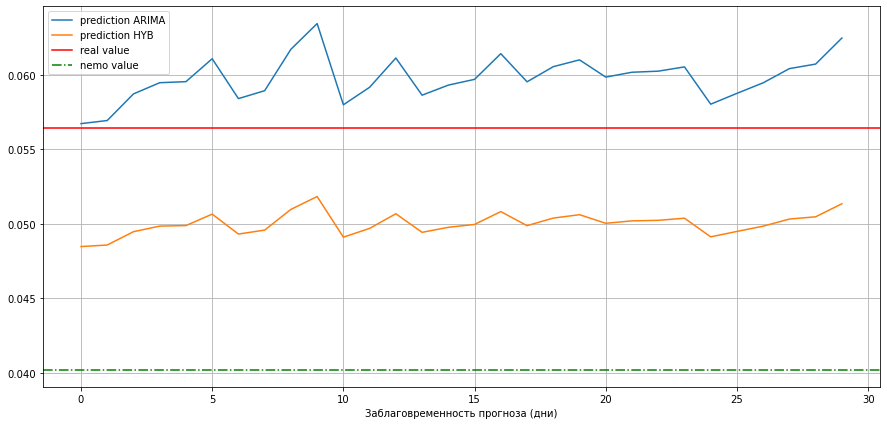

Test cell № 27


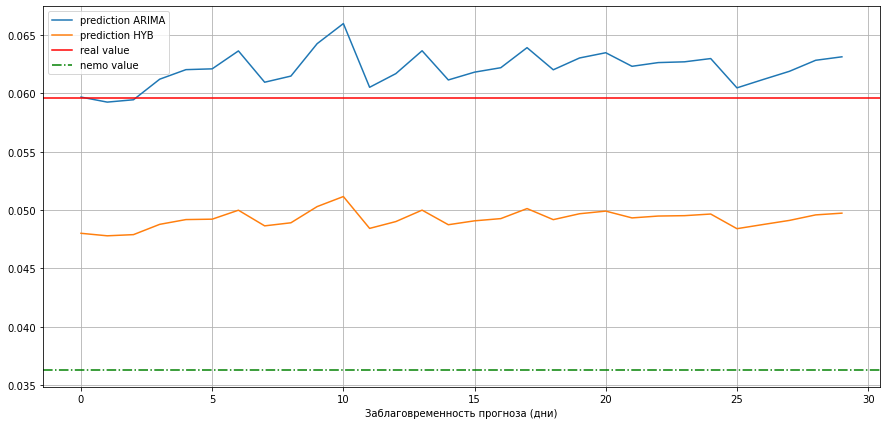

Test cell № 28


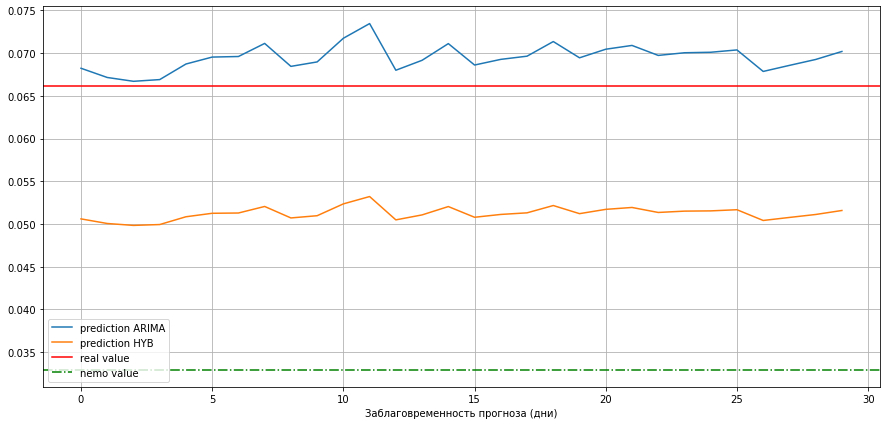

Test cell № 29


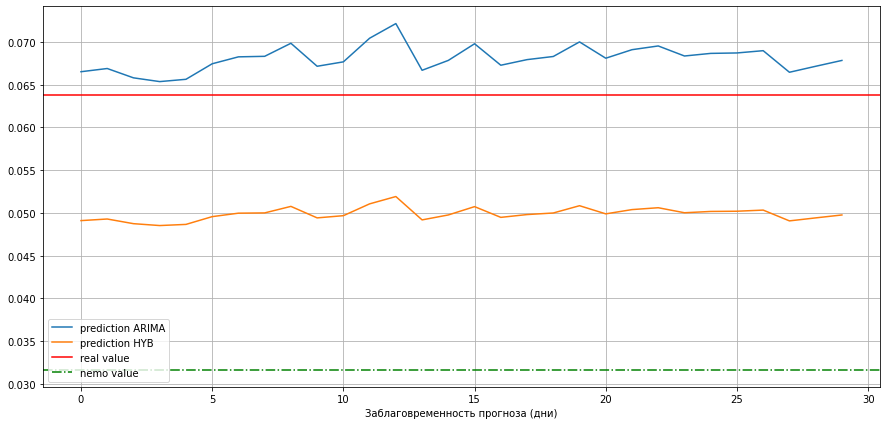

In [12]:
forc_n=30
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':
        print(column)
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forc_n:]
        test.index = df_rean['dates'][-forc_n:]
        data = df_rean[column][:-forc_n]
        data.index = df_rean['dates'][:-forc_n]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forc_n:]
        nemo_pr.index = df_nemo['dates'][-forc_n:]
        
        ARIMA_MSE_errors_list=[]
        ARIMA_MAE_errors_list=[]
        ARIMA_MAPE_errors_list=[]
        ARIMA_R2_errors_list=[]
        
        HYB_MSE_errors_list=[]
        HYB_MAE_errors_list=[]
        HYB_MAPE_errors_list=[]
        HYB_R2_errors_list=[]
        
        for j in range (forc_n): # для каждой ячейки из test
            #print(j)
            predictions_list=[]
            for i in range (forc_n): # для каждой из заблаговременностей
                data = df_rean[column][:-forc_n+j-i] # выделяем обучающую выборку
                f_size = i+1 # величина предсказания
                
                stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
                model_res = stlf.fit()
                forecasts_i = model_res.forecast(f_size).tolist()[-1] # делаем предсказание и берем последнее значение
                predictions_list.append(forecasts_i)# добавляем предсказание в список предсказаний со всеми заблаговременостями
            
            real_val_list=np.full(forc_n, test[j]) # создаем массив верных значений
            nemo_real_val_list=np.full(forc_n, nemo_pr[j]) # создаем массив верных значений по NEMO
            
            HYB_pr=(predictions_list+nemo_real_val_list)/2 # добавляем к списку предсказаний значение NEMO и усредняем            
            
            
            # считаем ошибки как отклонения от реального значения
            ARIMA_MSE_errors_list.append(mean_squared_error(real_val_list, predictions_list))
            ARIMA_MAE_errors_list.append(mean_absolute_error(real_val_list, predictions_list))
            ARIMA_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-predictions_list)/real_val_list)*100,3))
            ARIMA_R2_errors_list.append(r2_score(real_val_list, predictions_list))
            
            HYB_MSE_errors_list.append(mean_squared_error(real_val_list, HYB_pr))
            HYB_MAE_errors_list.append(mean_absolute_error(real_val_list, HYB_pr))
            HYB_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-HYB_pr)/real_val_list)*100,3))
            HYB_R2_errors_list.append(r2_score(real_val_list, HYB_pr))
            
            
            print('Test cell № %s'%str(j))
            plt.plot(np.arange(len(predictions_list)), predictions_list, label='prediction ARIMA')
            plt.plot(np.arange(len(HYB_pr)), HYB_pr, label='prediction HYB')
            plt.axhline(y=test[j], color='r', linestyle='-', label='real value')
            plt.axhline(y=nemo_pr[j], color='green', linestyle='-.', label='nemo value')
            plt.xlabel("Заблаговременность прогноза (дни)")
            plt.legend()
            plt.grid()
            plt.show()
        break
            

76.04_8.72
Test cell № 0


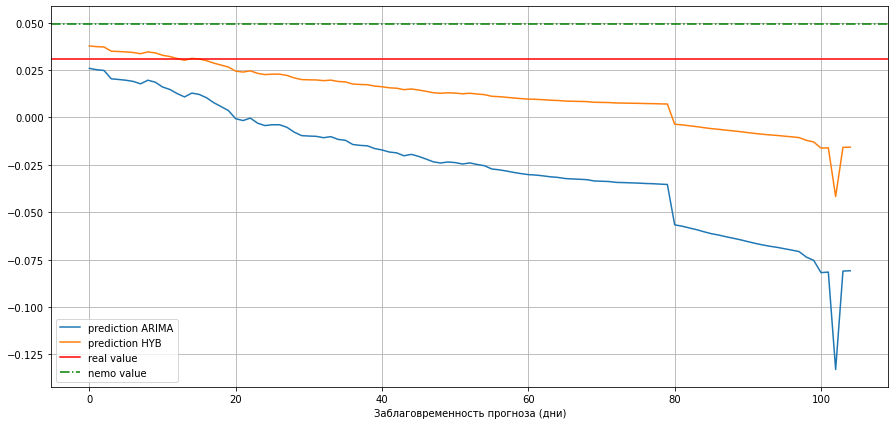

Test cell № 1


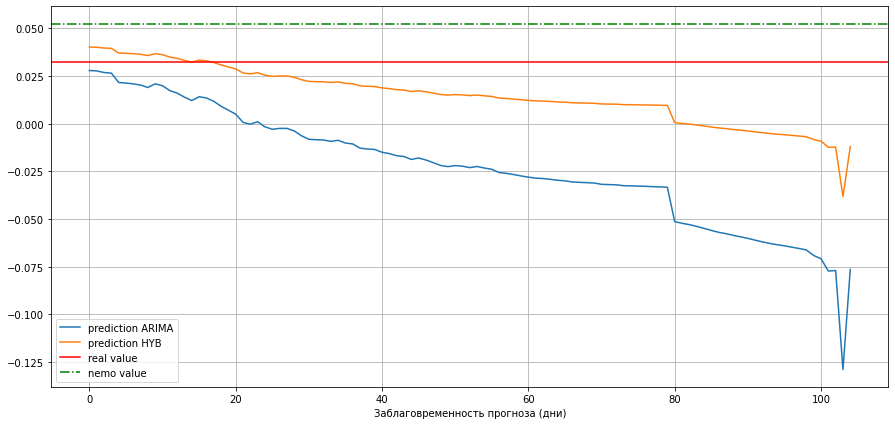

Test cell № 2


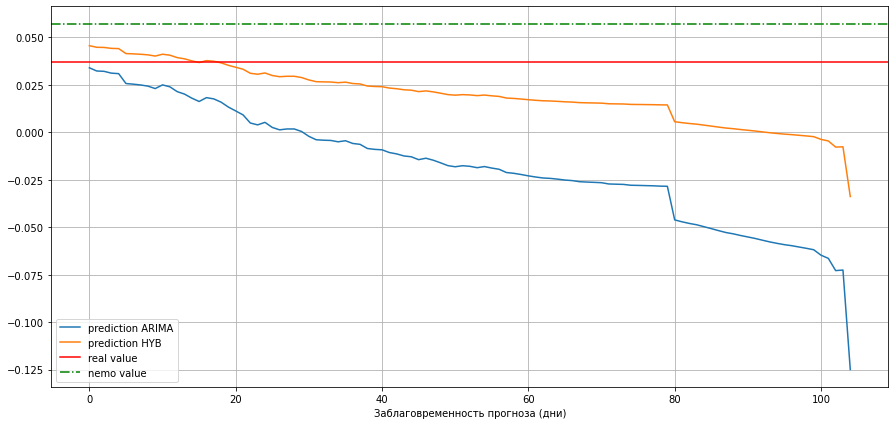

Test cell № 3


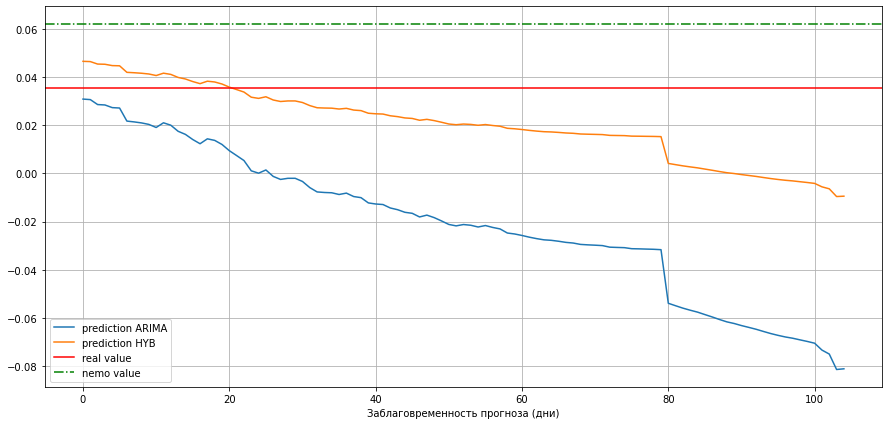

Test cell № 4


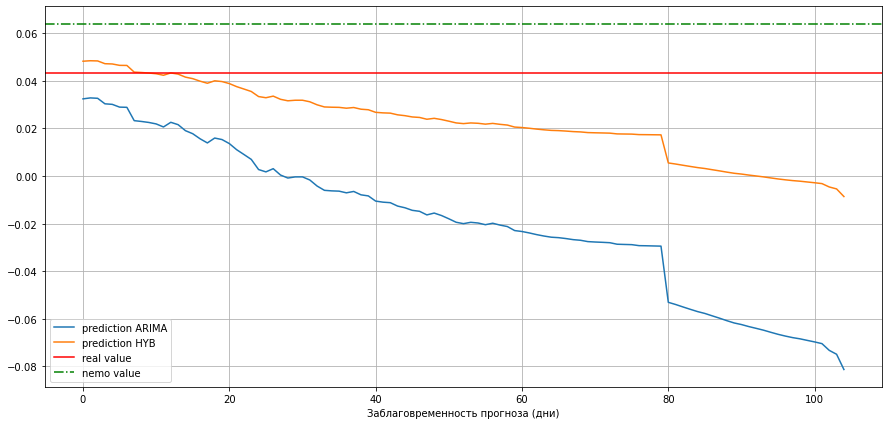

Test cell № 5


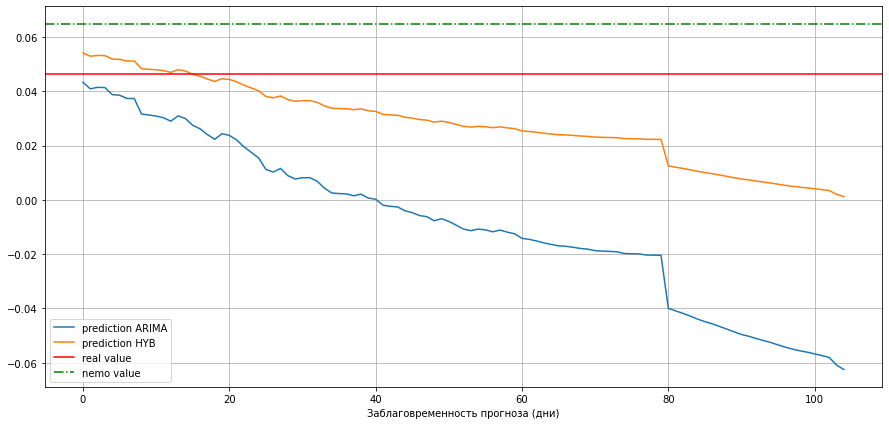

Test cell № 6


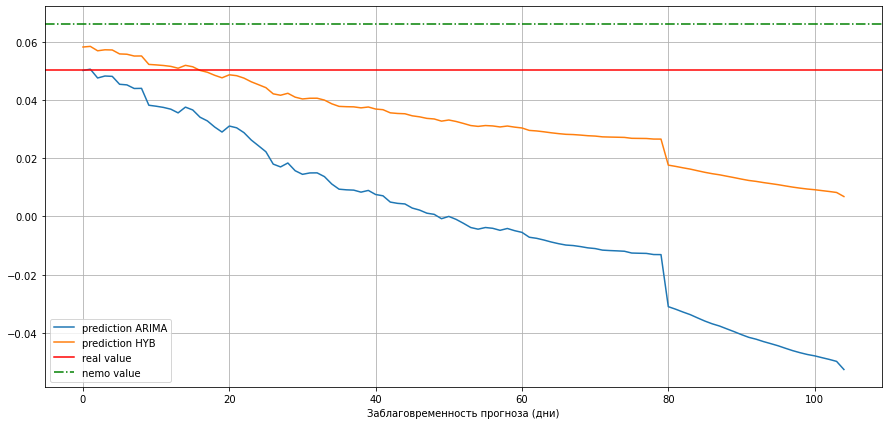

Test cell № 7


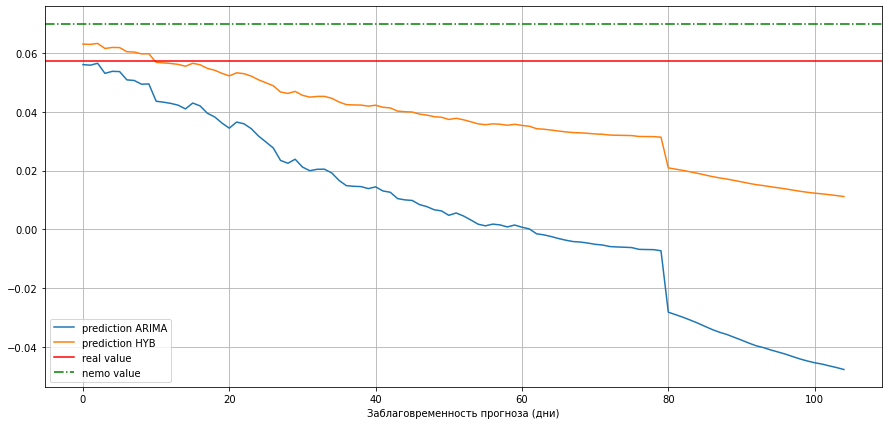

Test cell № 8


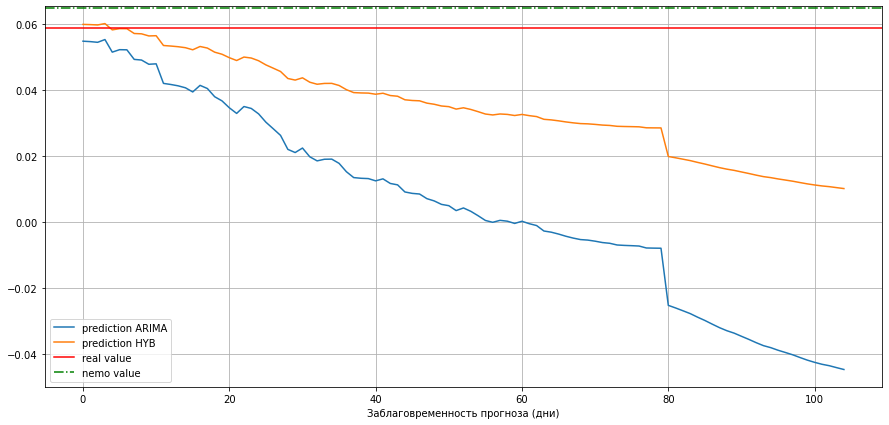

Test cell № 9


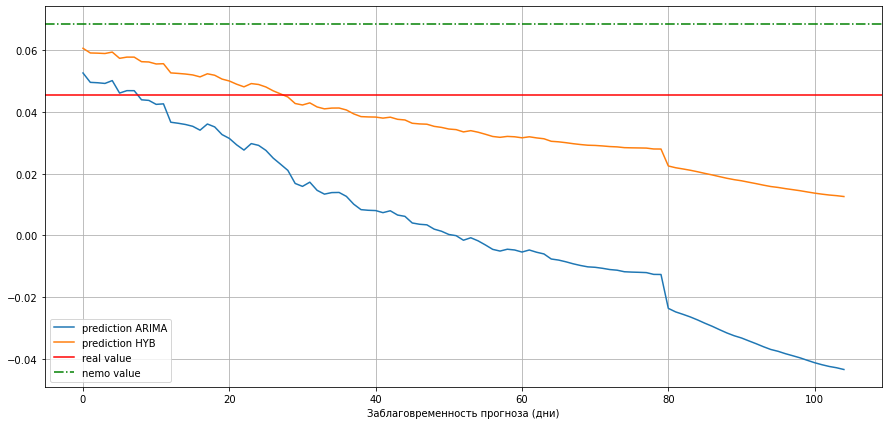

Test cell № 10


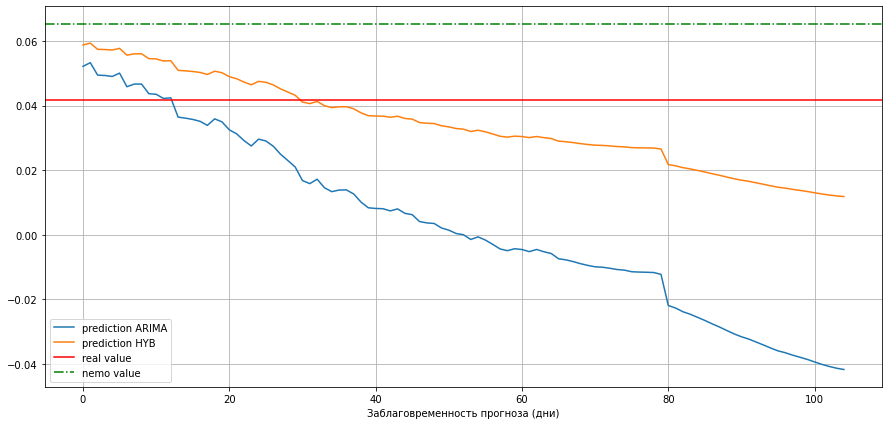

Test cell № 11


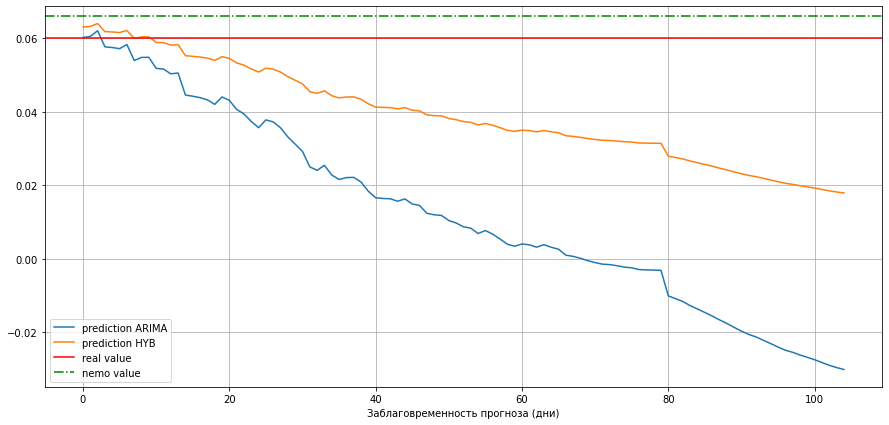

Test cell № 12


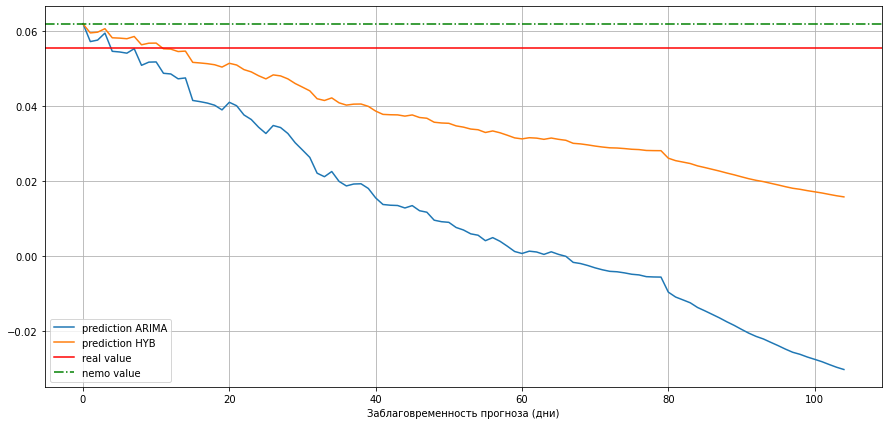

Test cell № 13


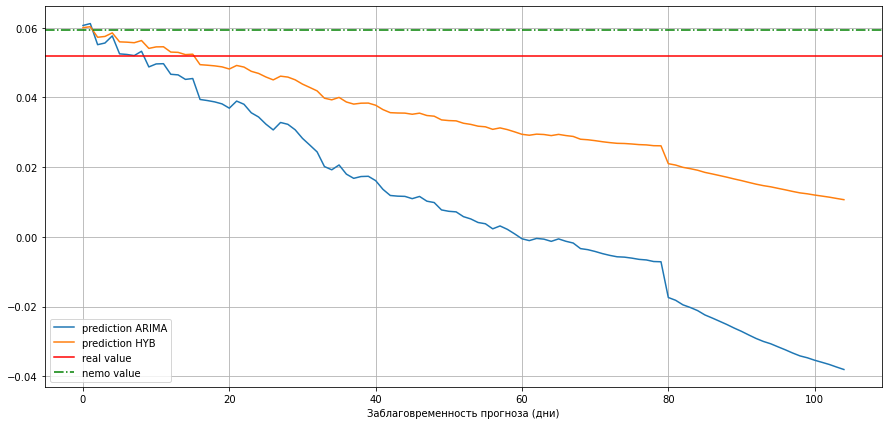

Test cell № 14


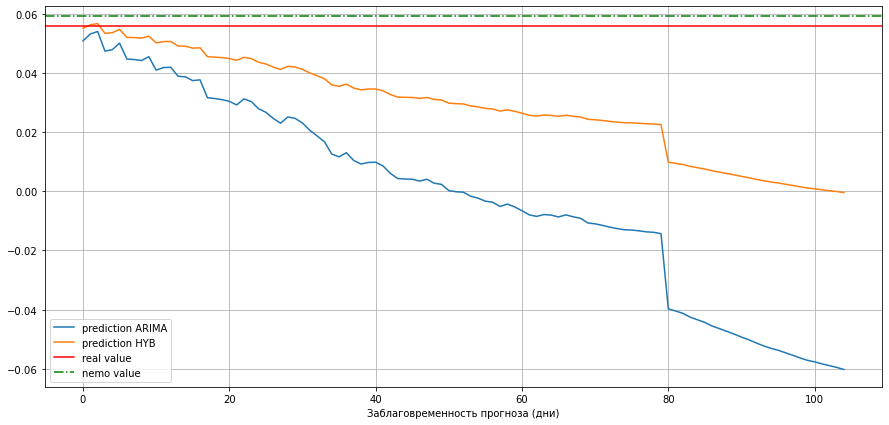

Test cell № 15


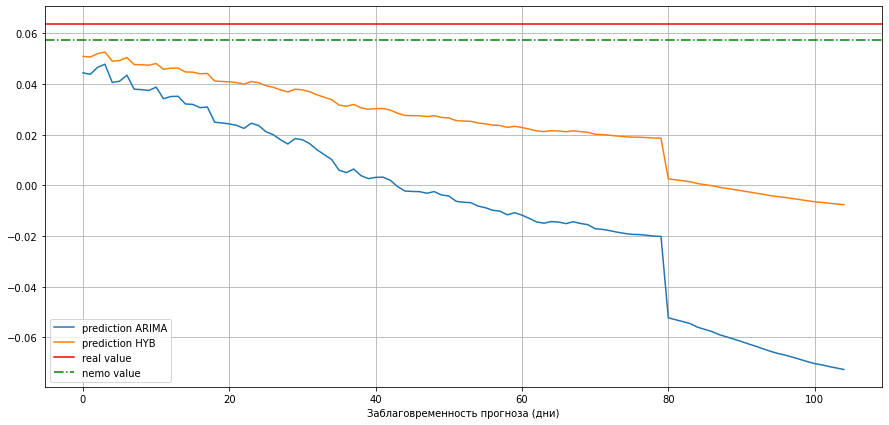

Test cell № 16


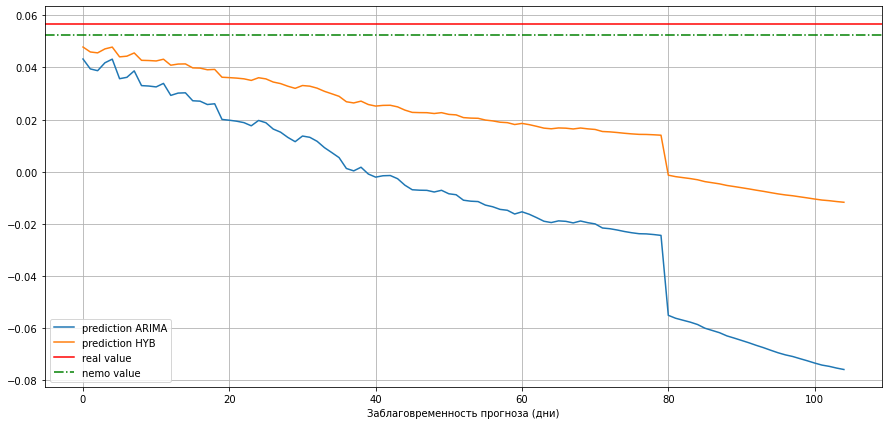

Test cell № 17


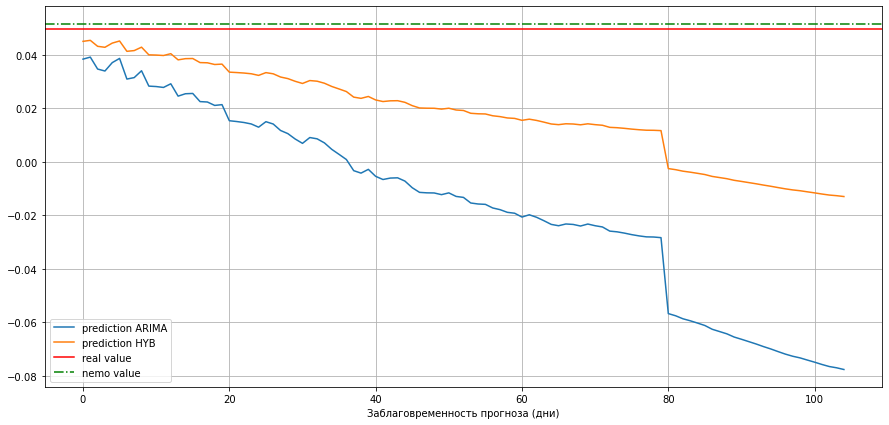

Test cell № 18


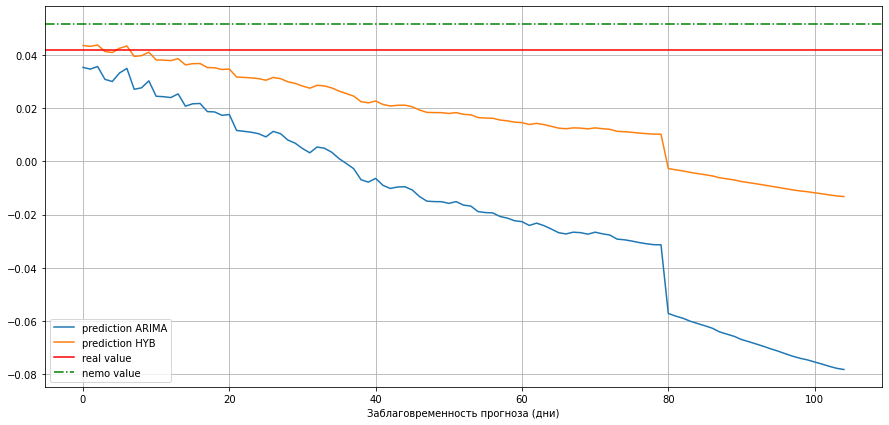

Test cell № 19


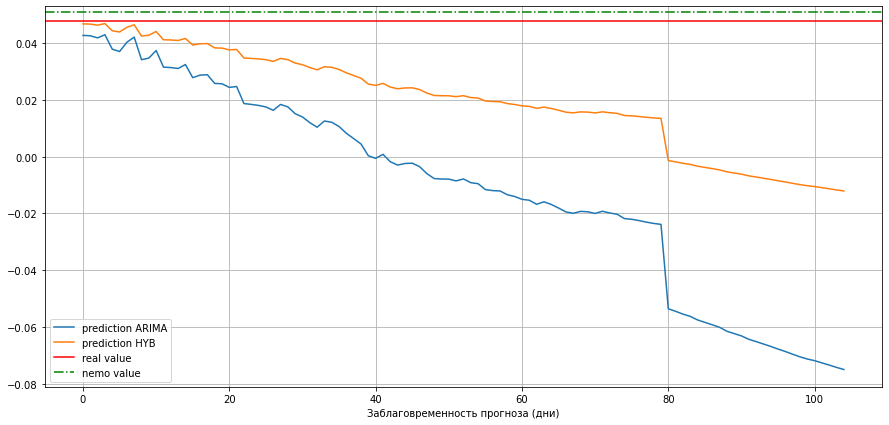

Test cell № 20


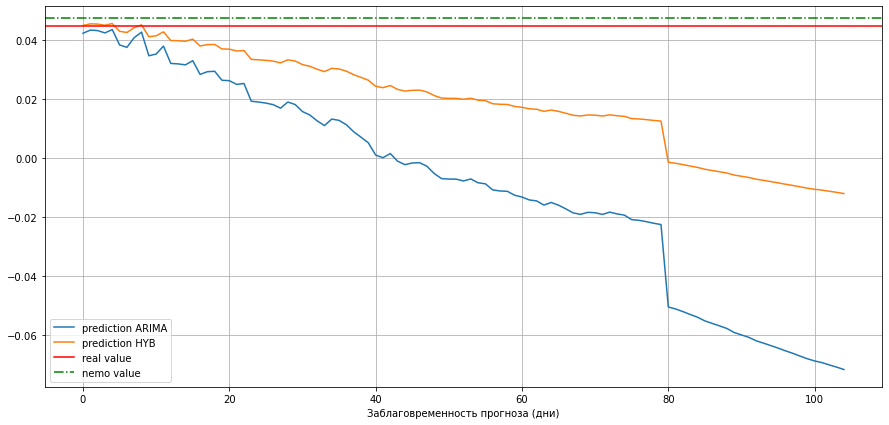

Test cell № 21


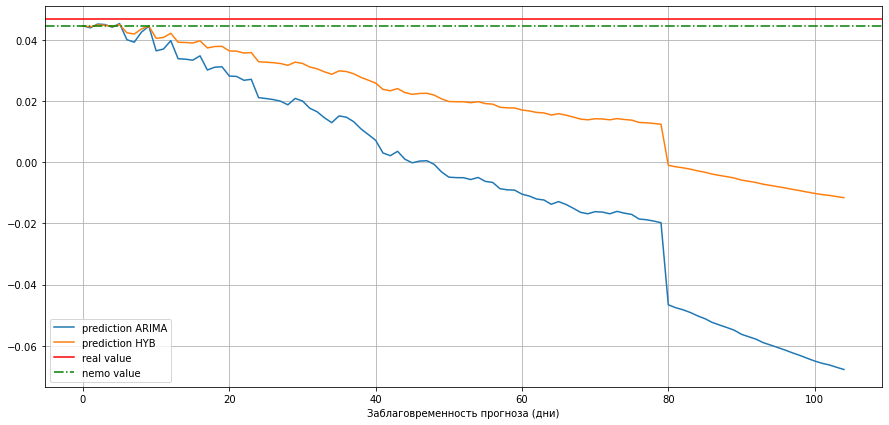

Test cell № 22


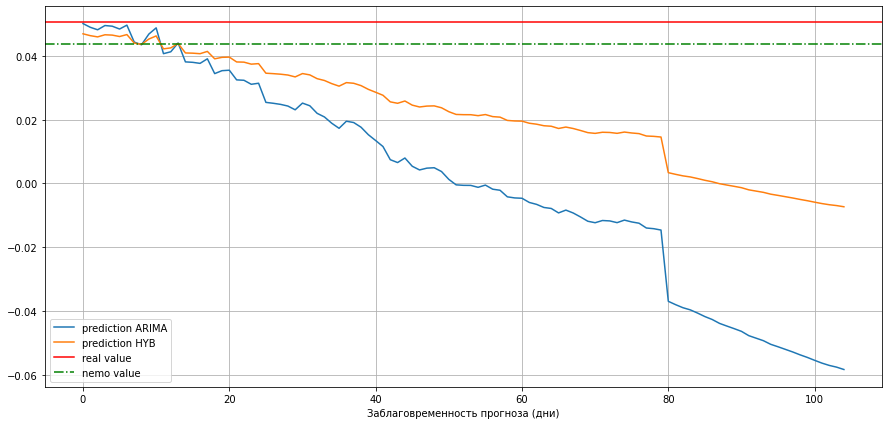

Test cell № 23


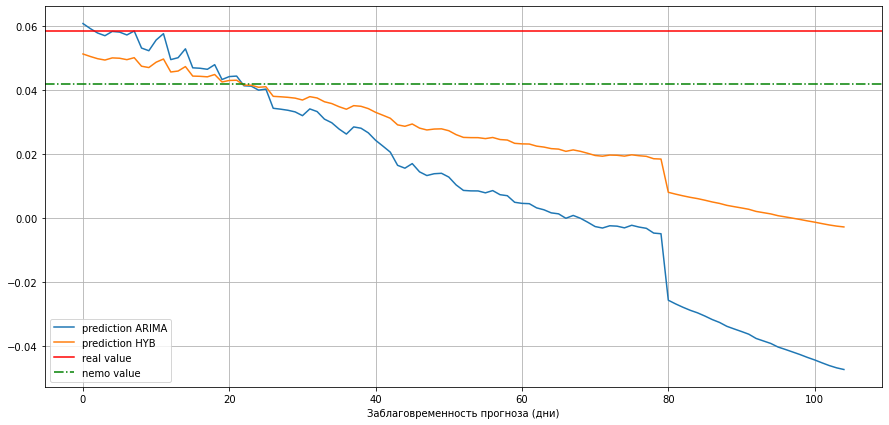

Test cell № 24


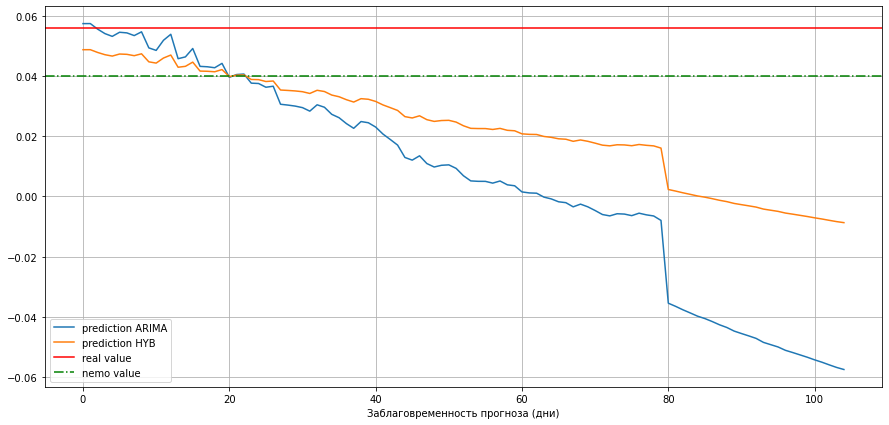

Test cell № 25


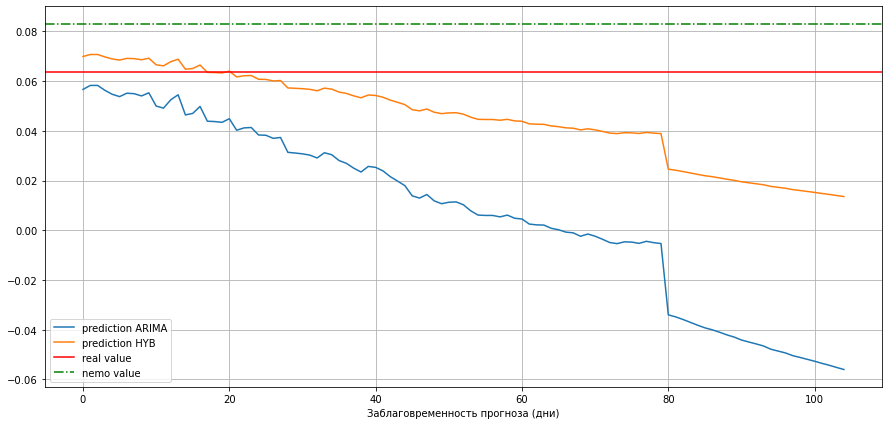

Test cell № 26


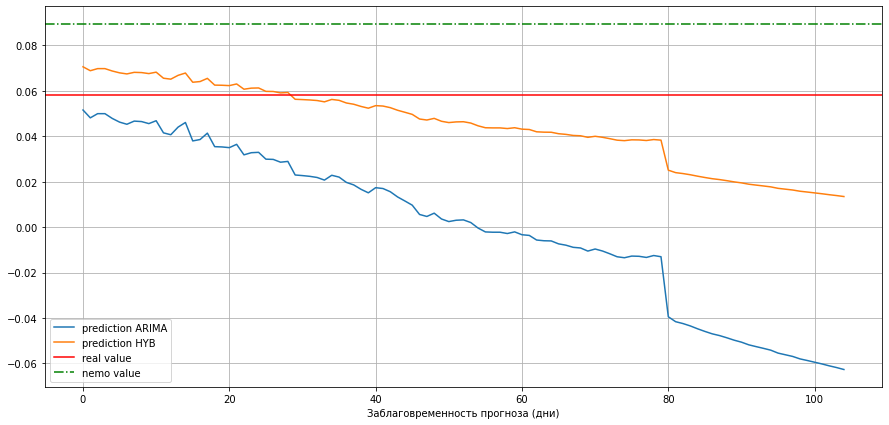

Test cell № 27


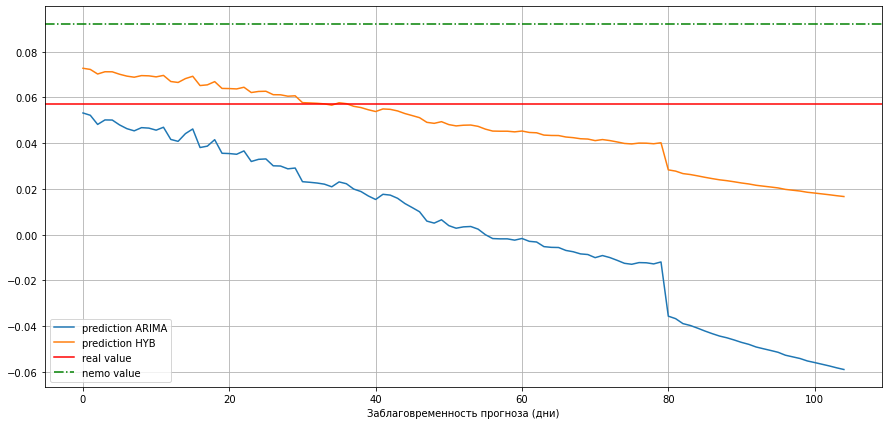

Test cell № 28


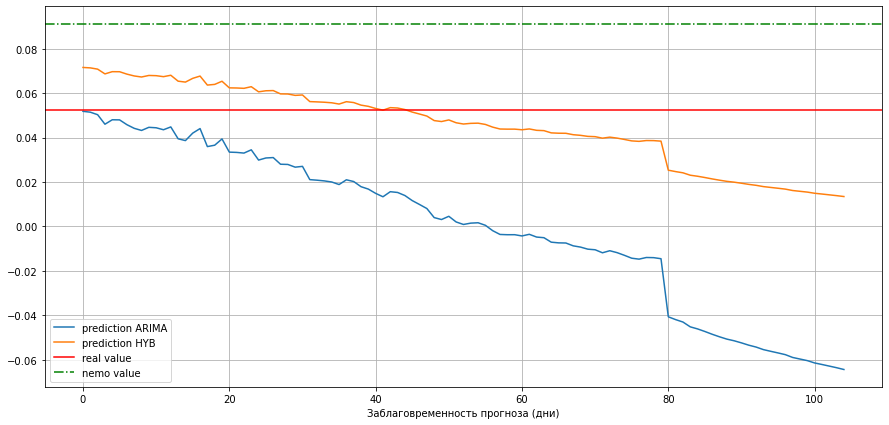

Test cell № 29


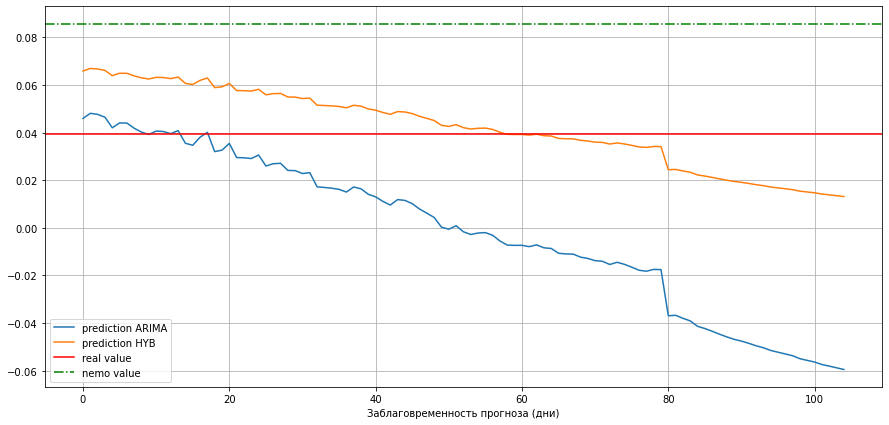

Test cell № 30


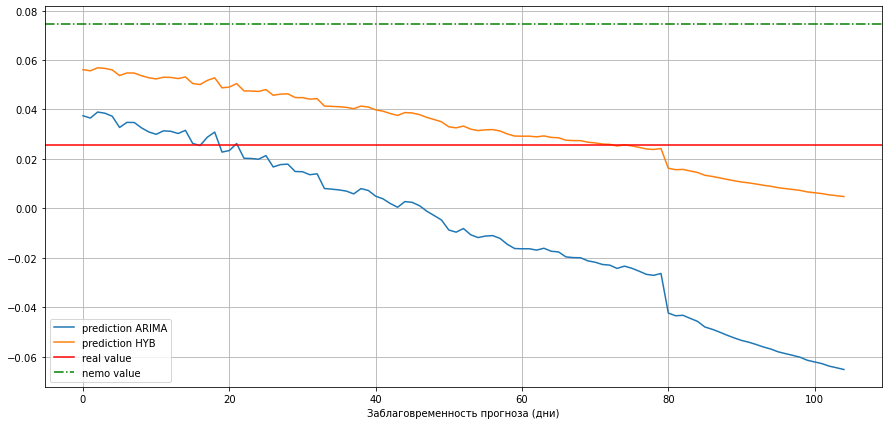

Test cell № 31


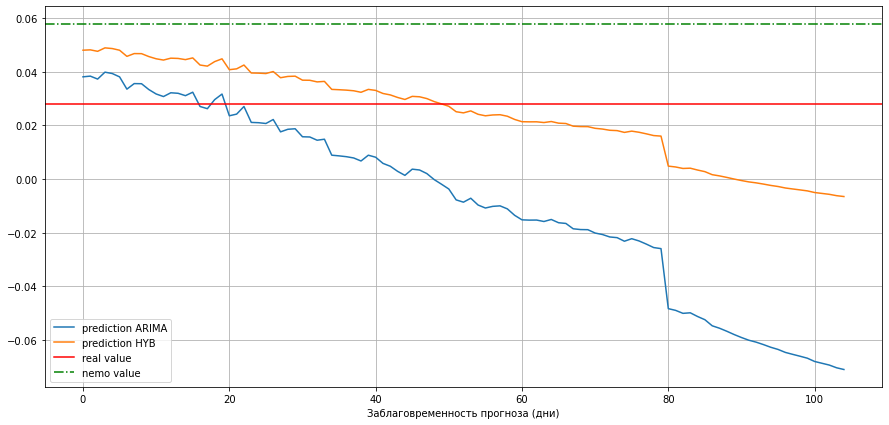

Test cell № 32


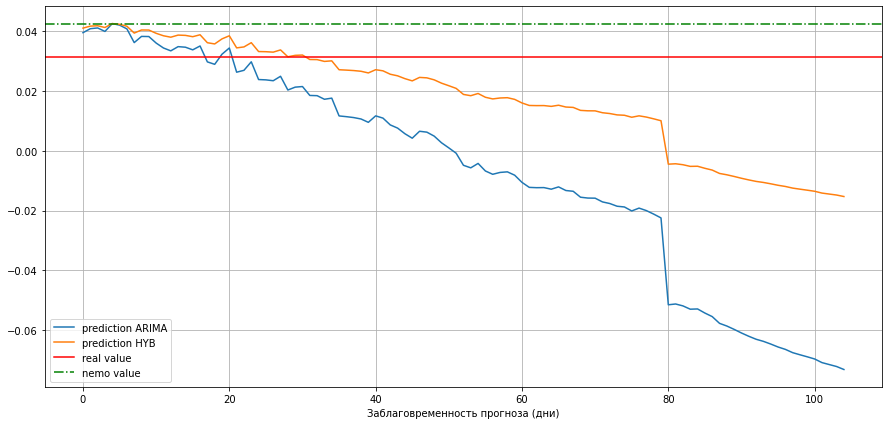

Test cell № 33


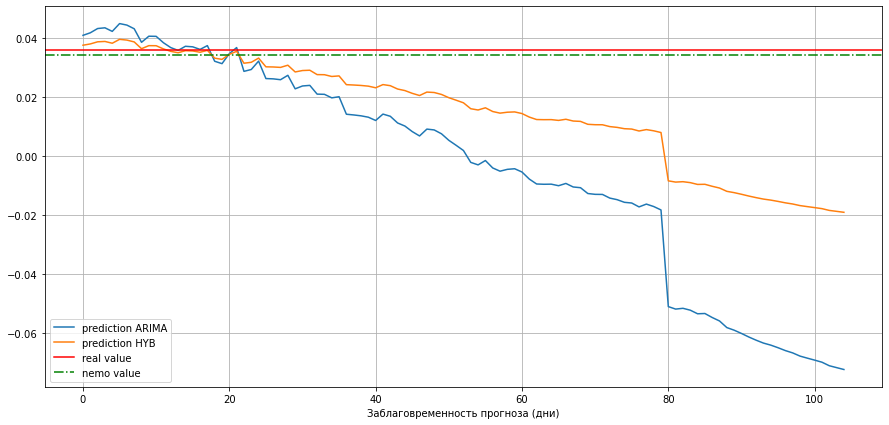

Test cell № 34


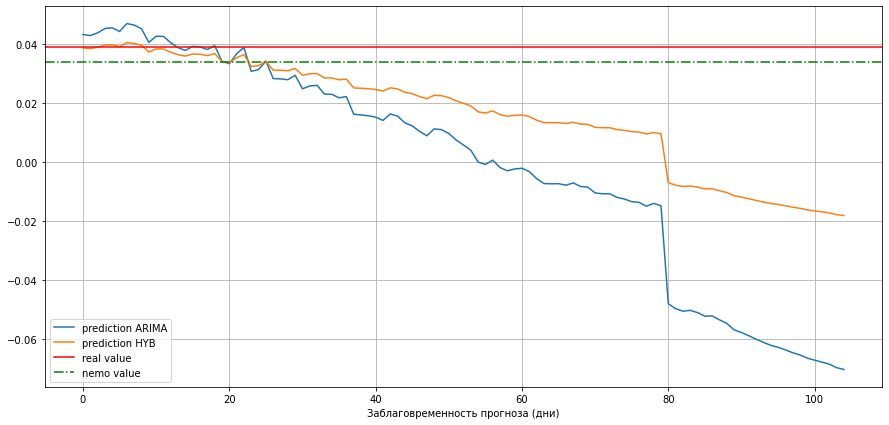

Test cell № 35


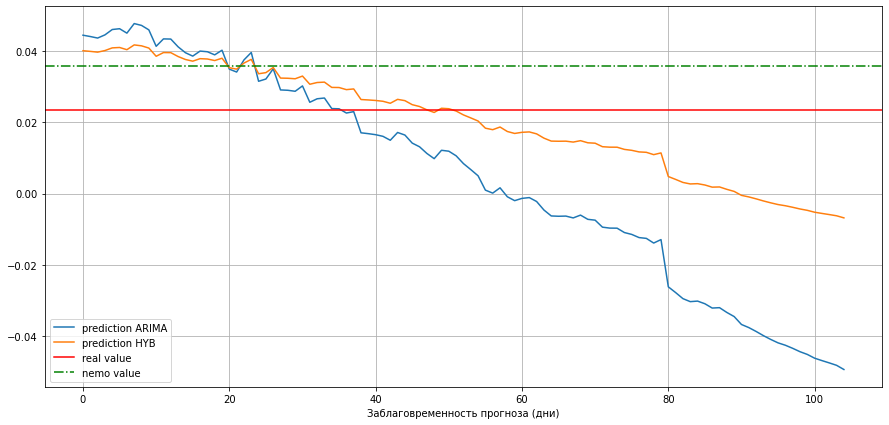

Test cell № 36


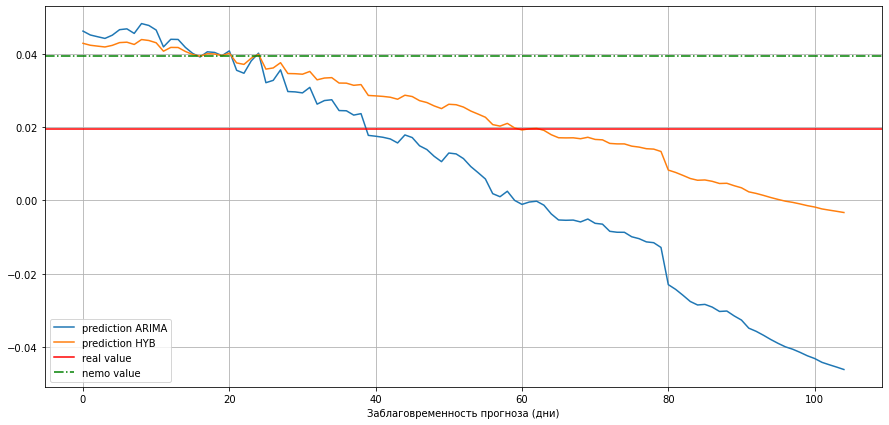

Test cell № 37


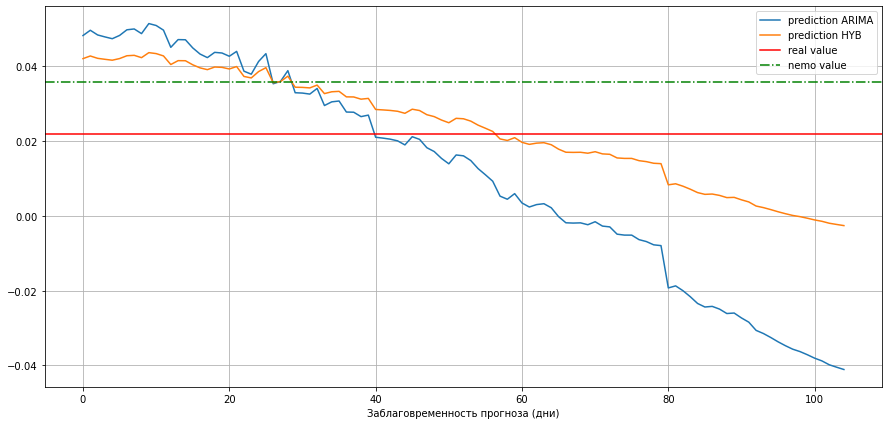

Test cell № 38


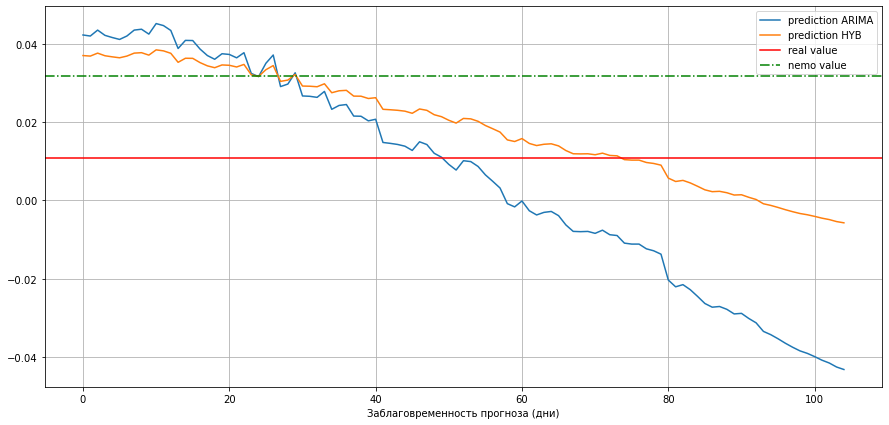

Test cell № 39


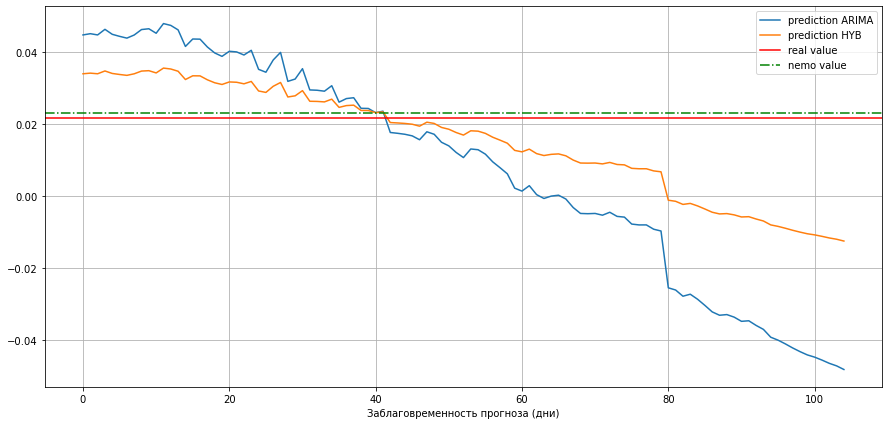

Test cell № 40


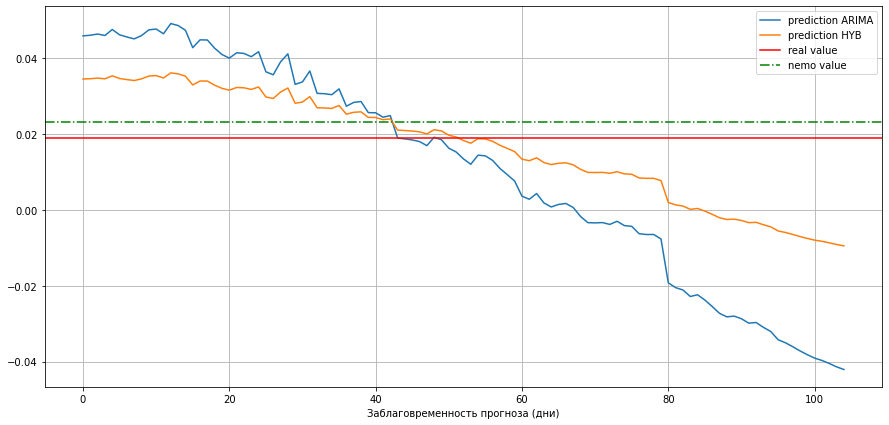

Test cell № 41


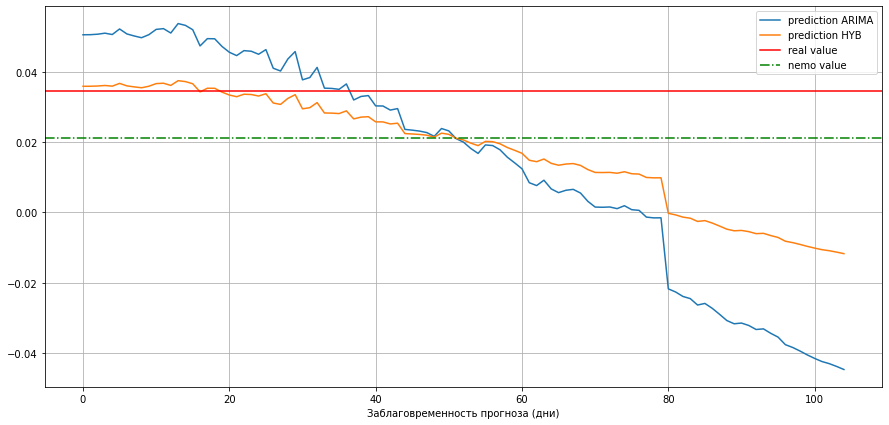

Test cell № 42


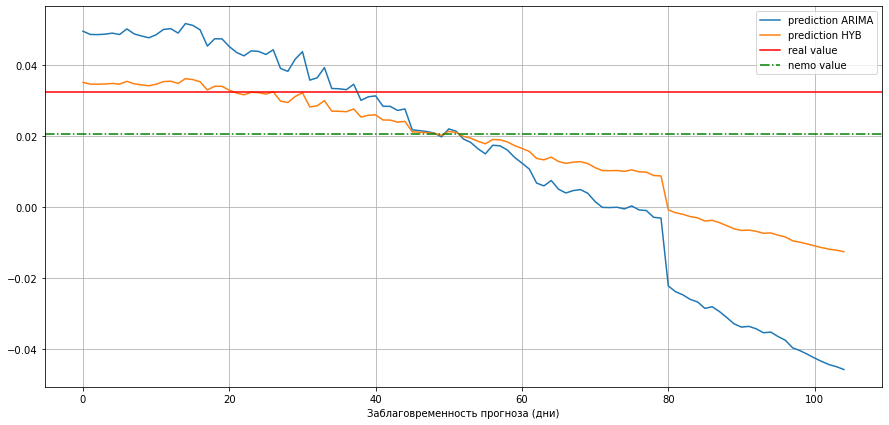

Test cell № 43


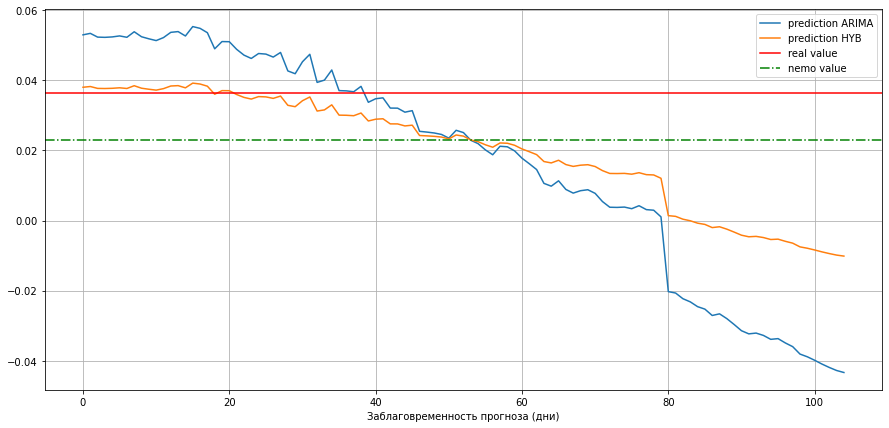

Test cell № 44


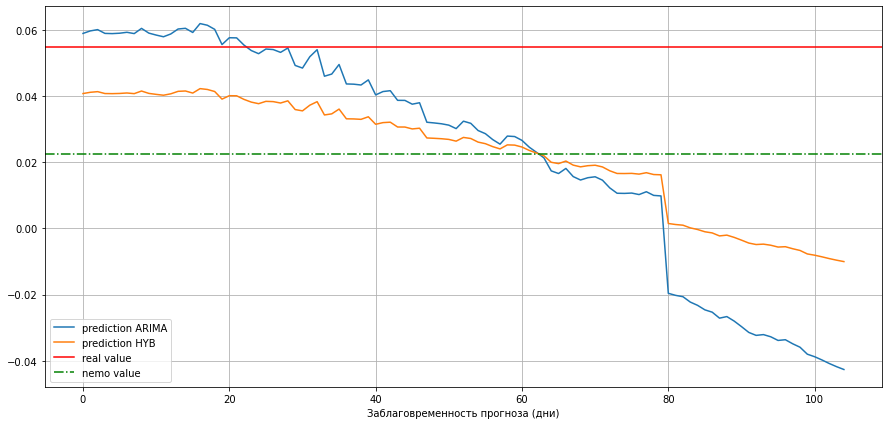

Test cell № 45


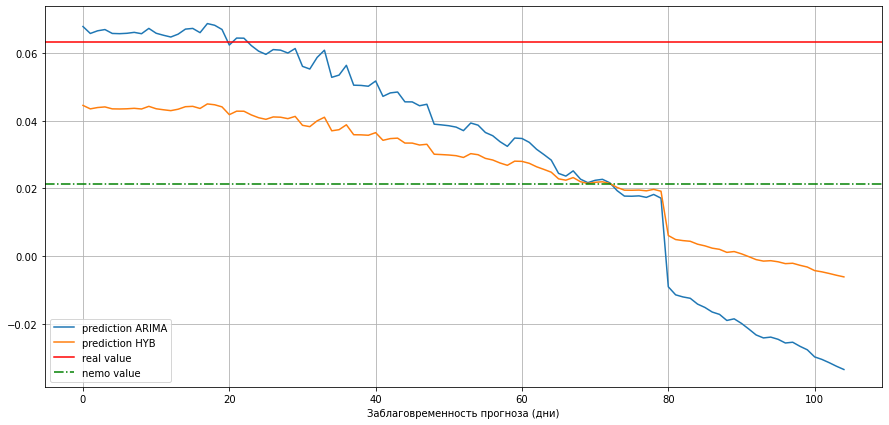

Test cell № 46


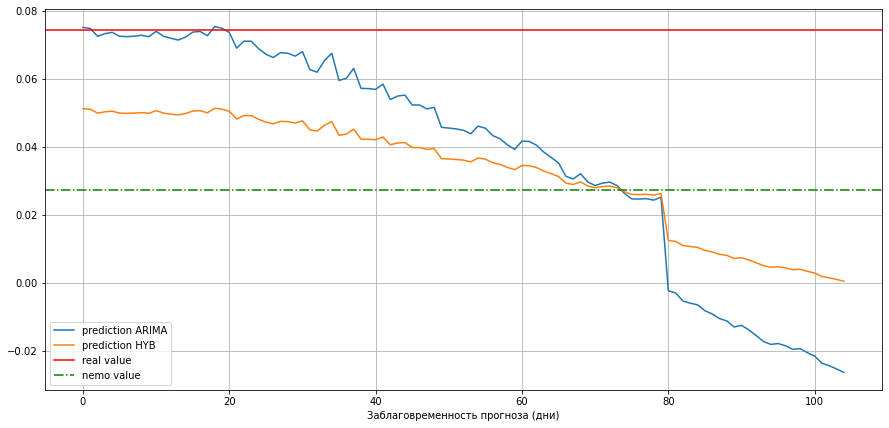

Test cell № 47


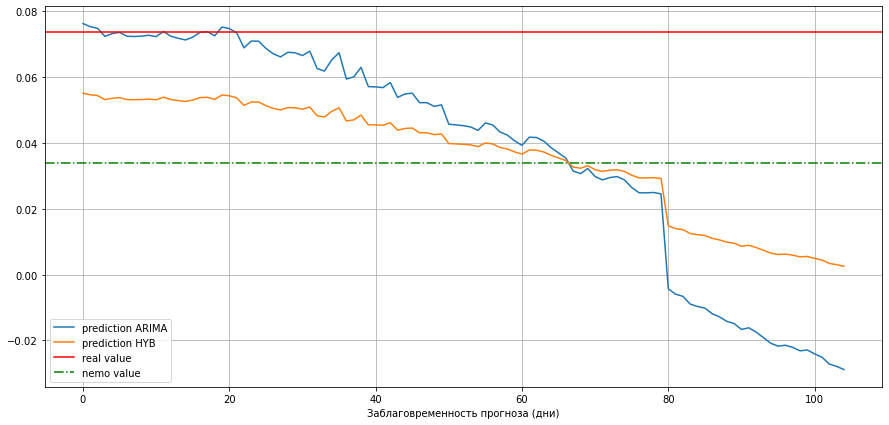

Test cell № 48


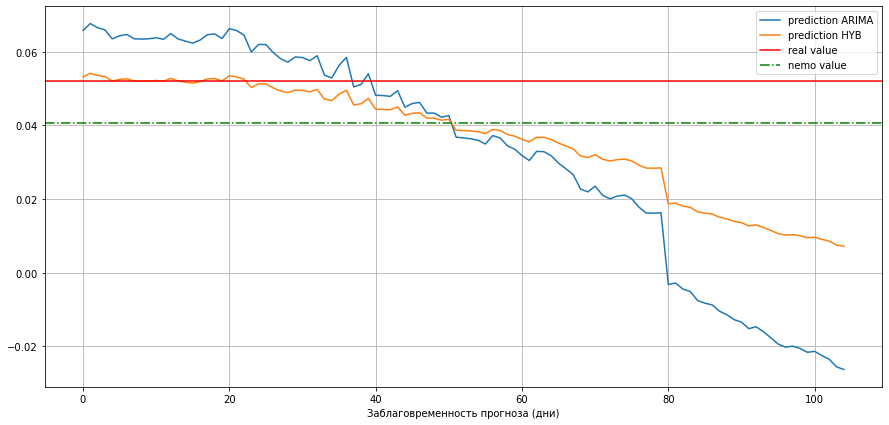

Test cell № 49


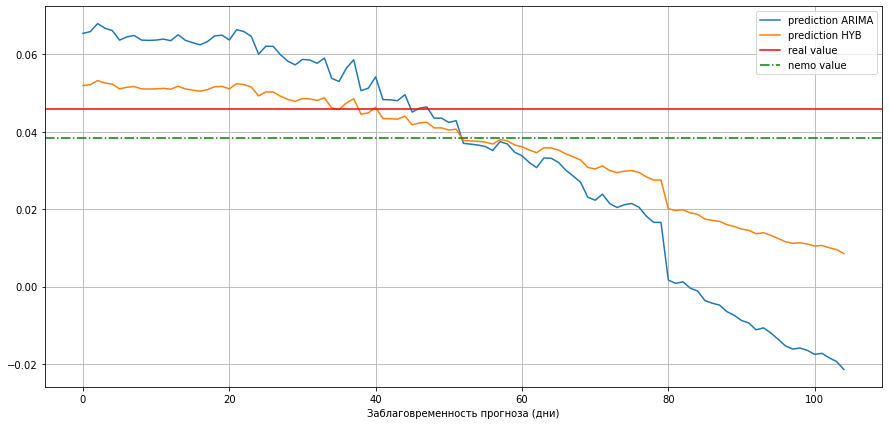

Test cell № 50


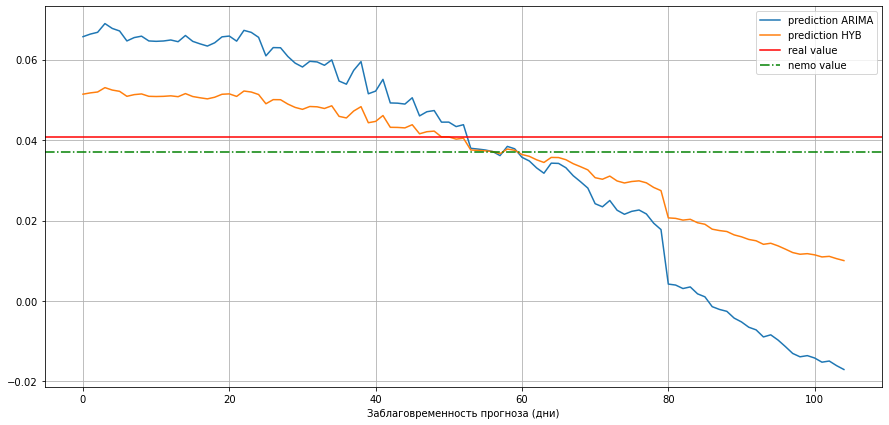

Test cell № 51


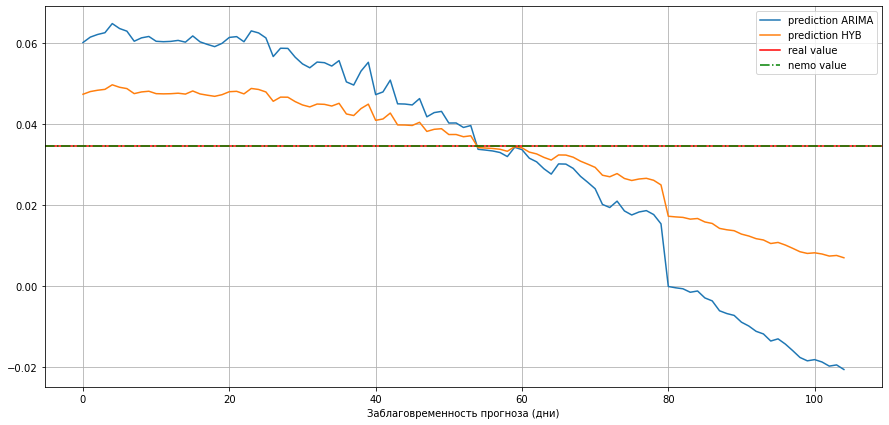

Test cell № 52


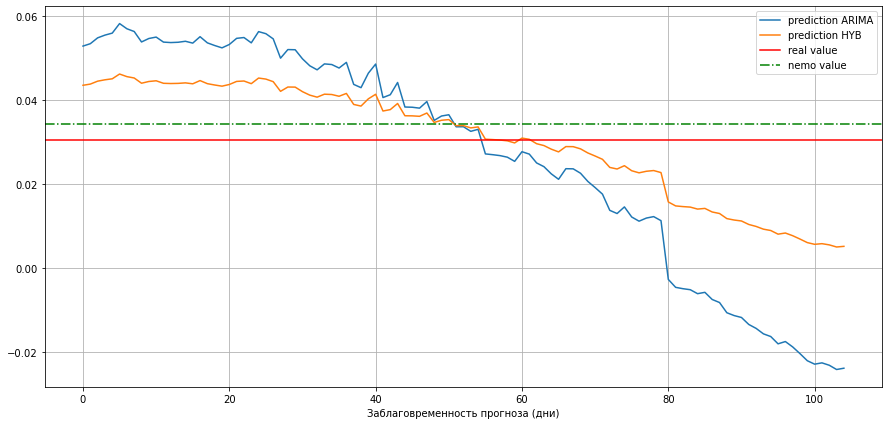

Test cell № 53


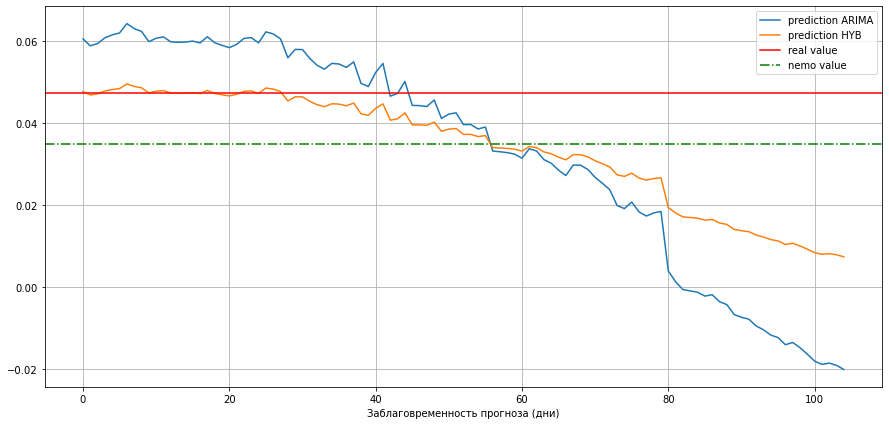

Test cell № 54


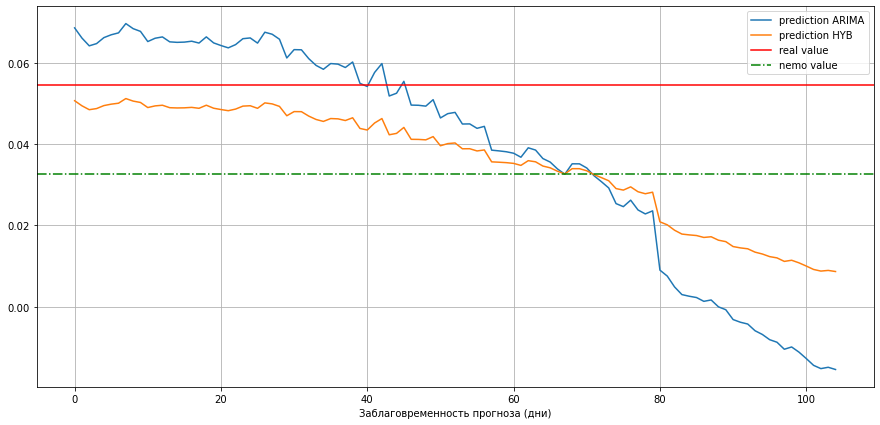

Test cell № 55


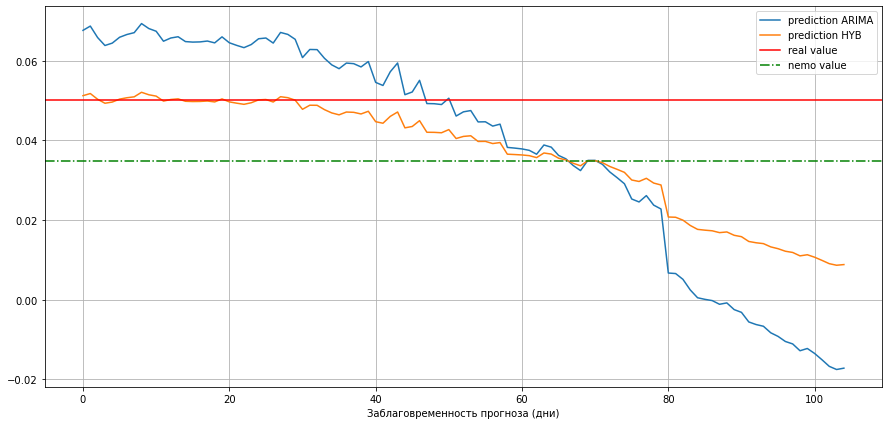

Test cell № 56


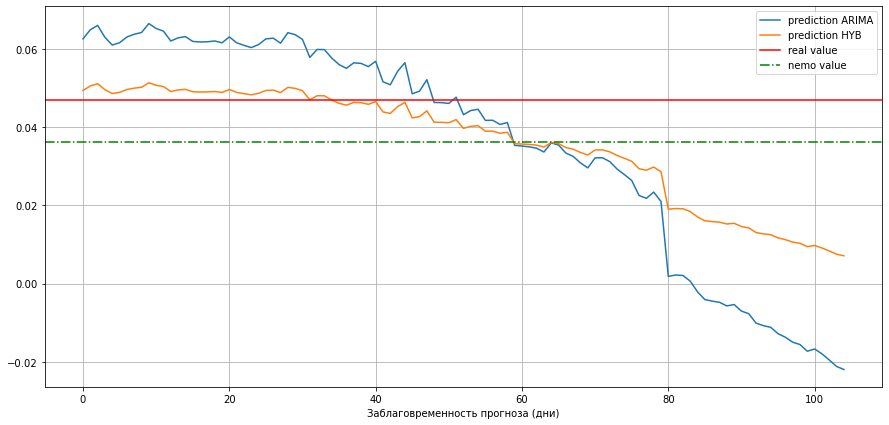

Test cell № 57


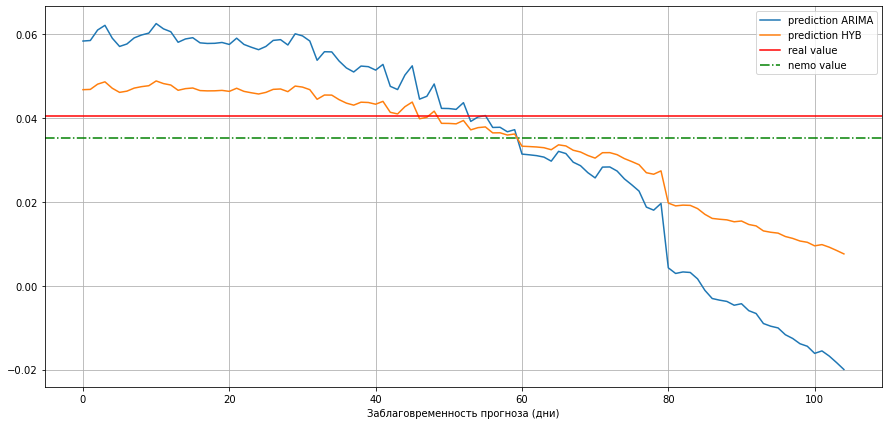

Test cell № 58


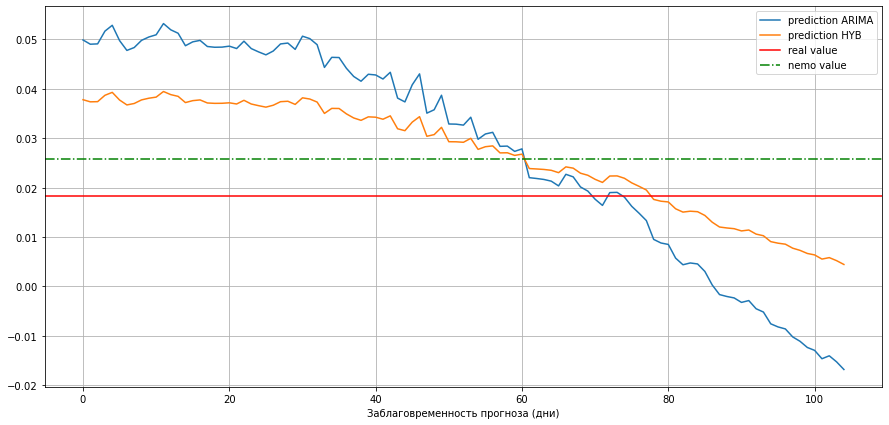

Test cell № 59


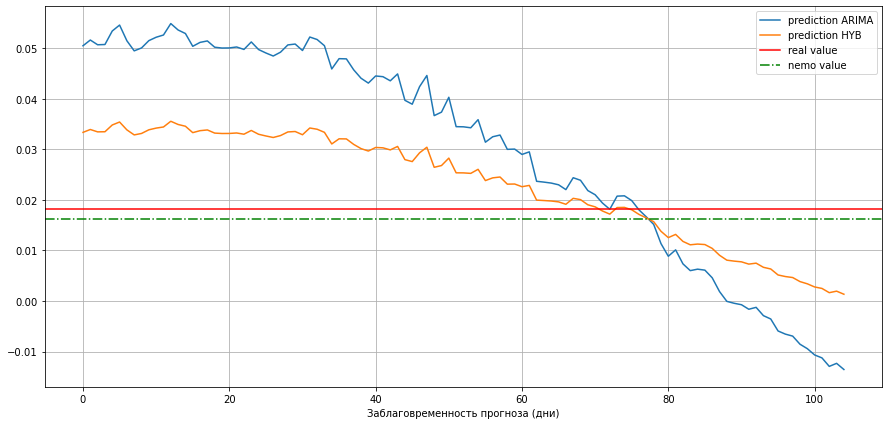

Test cell № 60


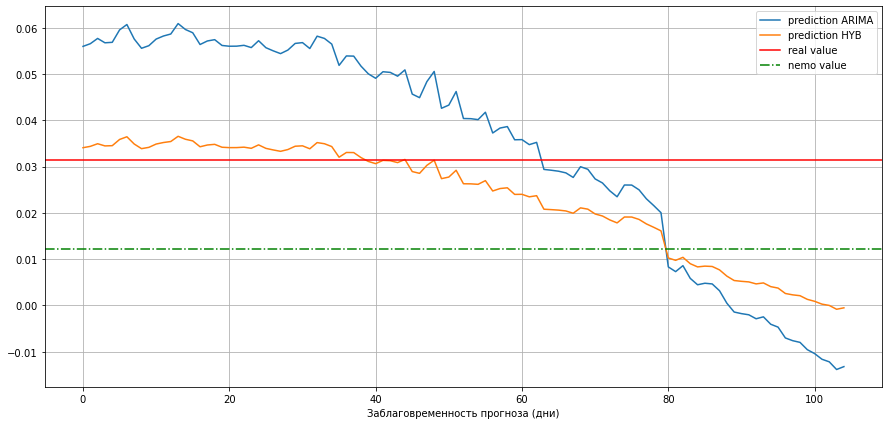

Test cell № 61


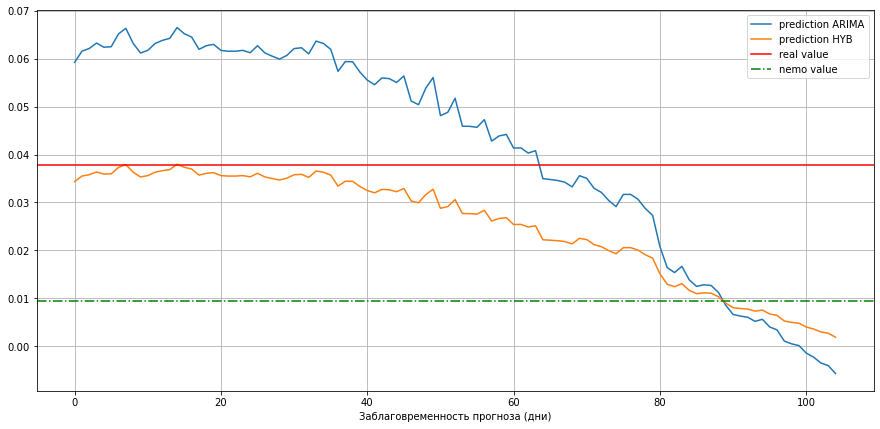

Test cell № 62


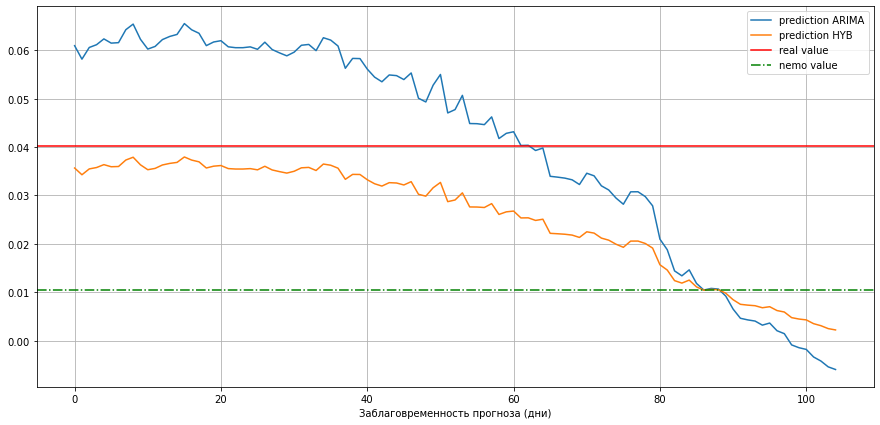

Test cell № 63


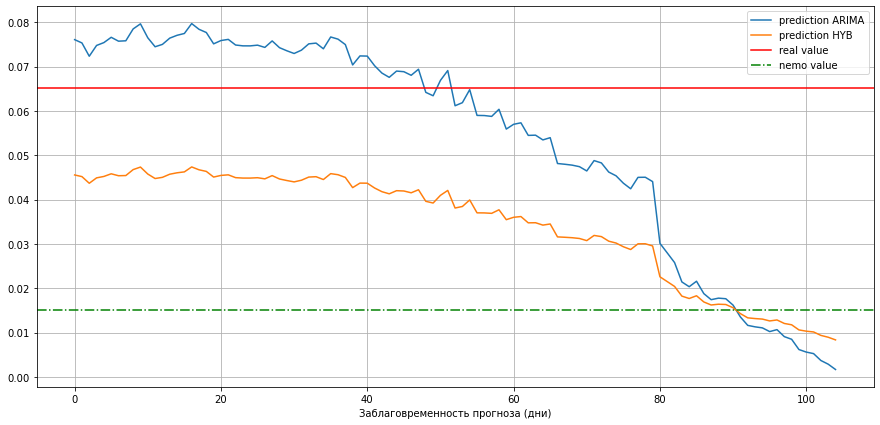

Test cell № 64


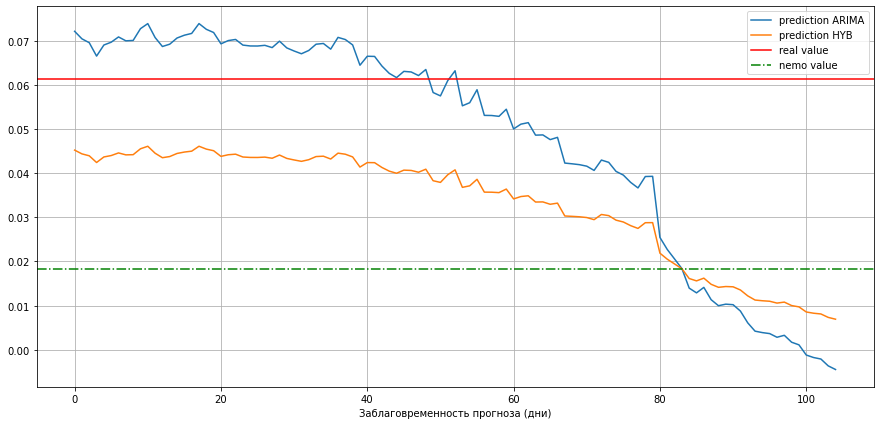

Test cell № 65


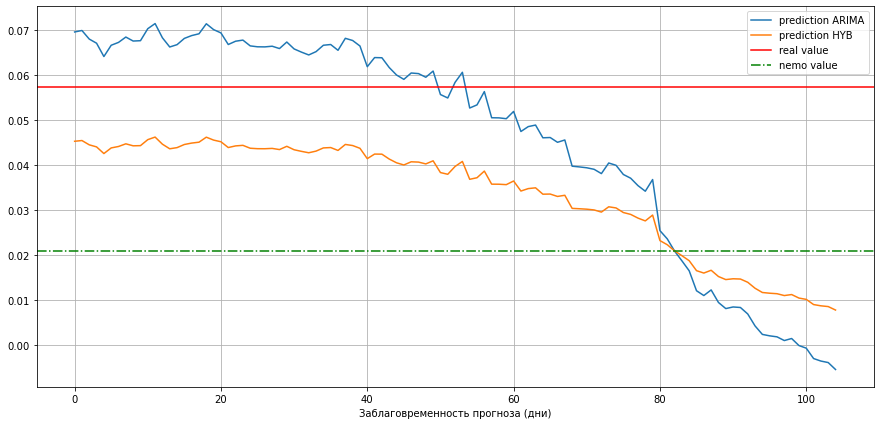

Test cell № 66


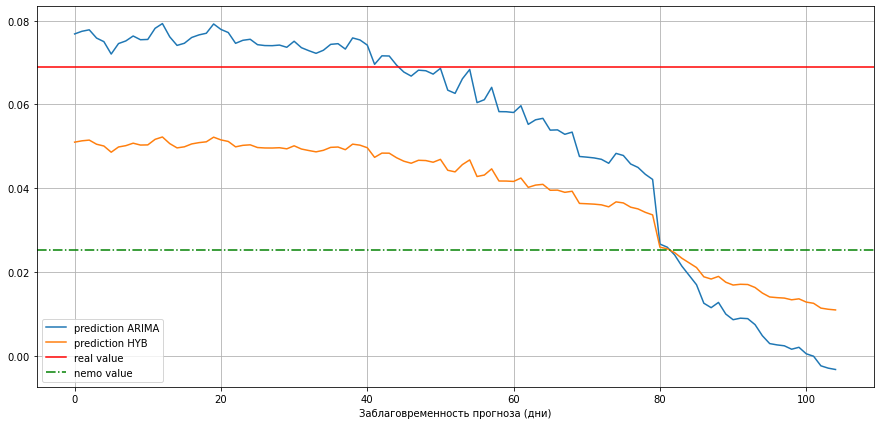

Test cell № 67


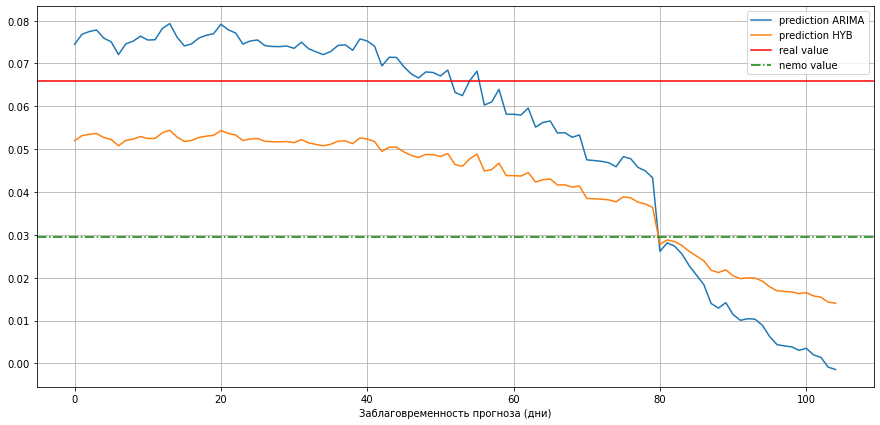

Test cell № 68


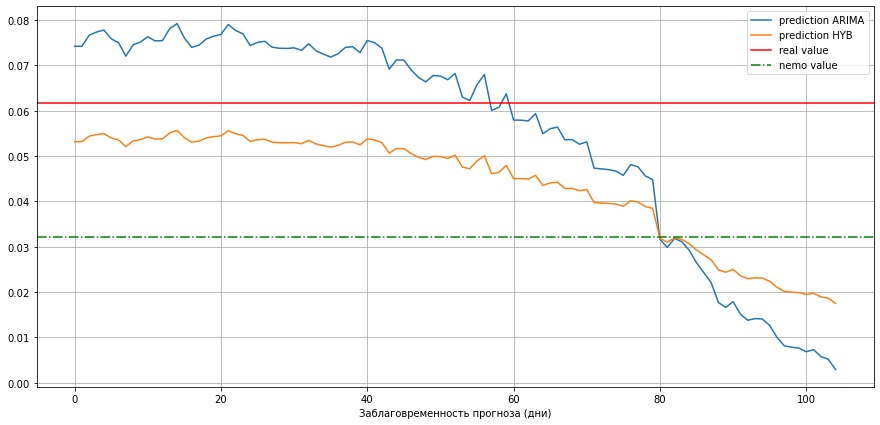

Test cell № 69


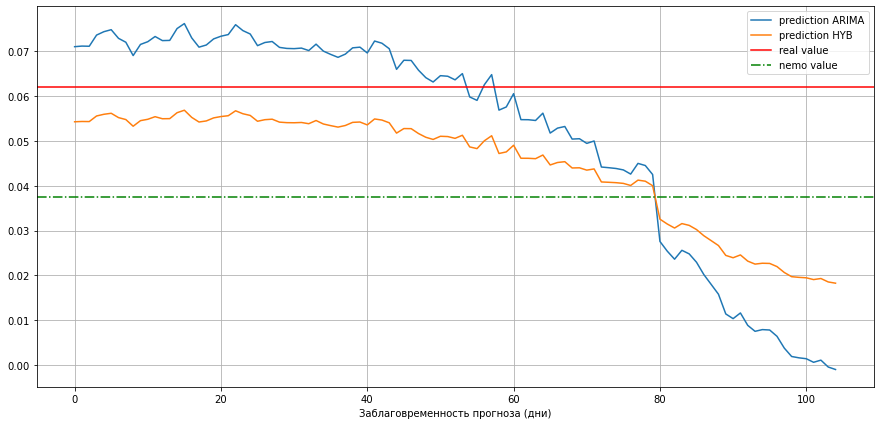

Test cell № 70


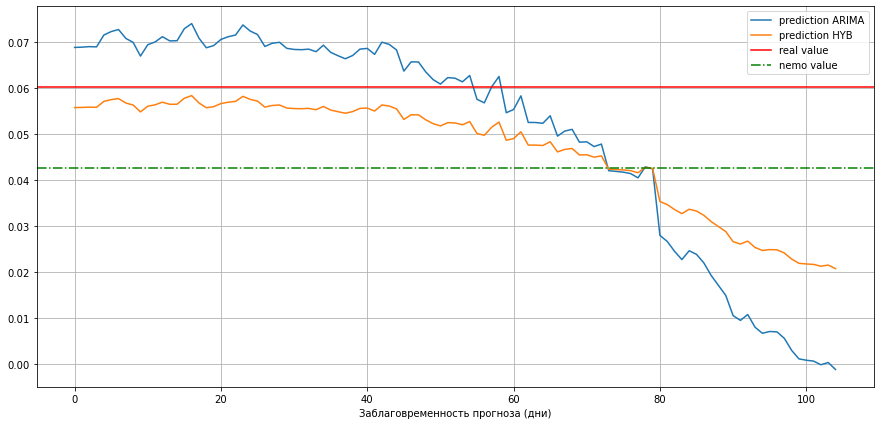

Test cell № 71


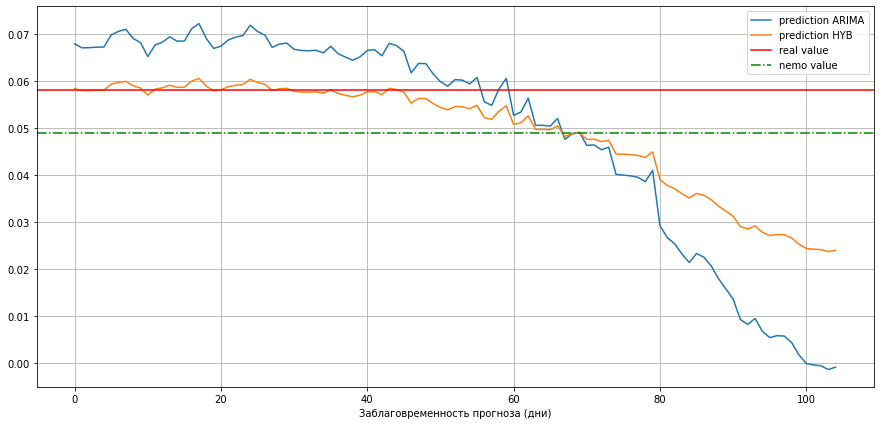

Test cell № 72


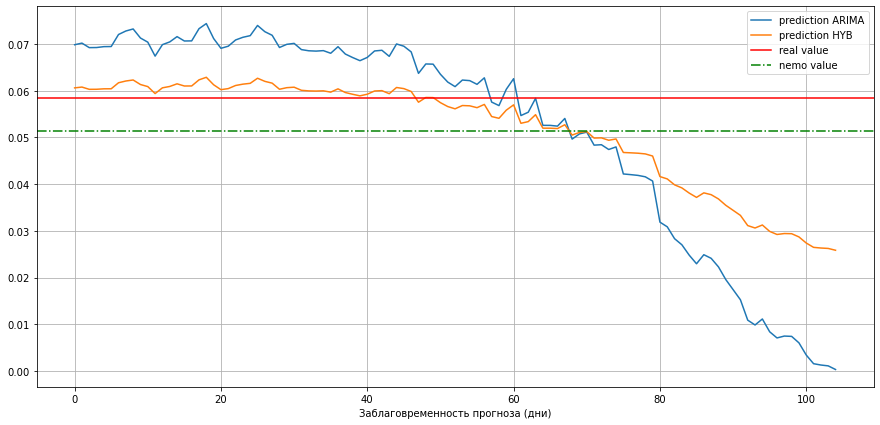

Test cell № 73


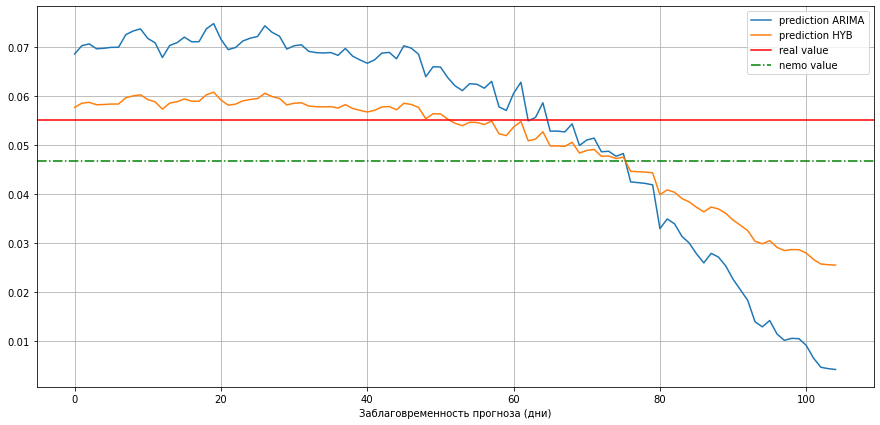

Test cell № 74


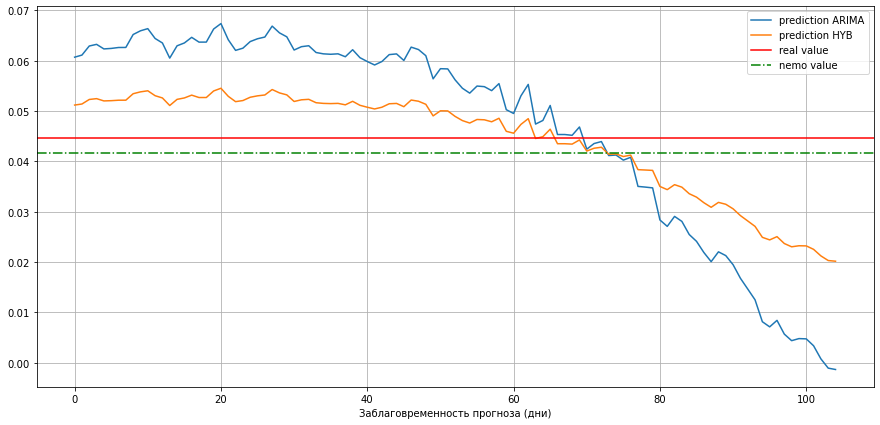

Test cell № 75


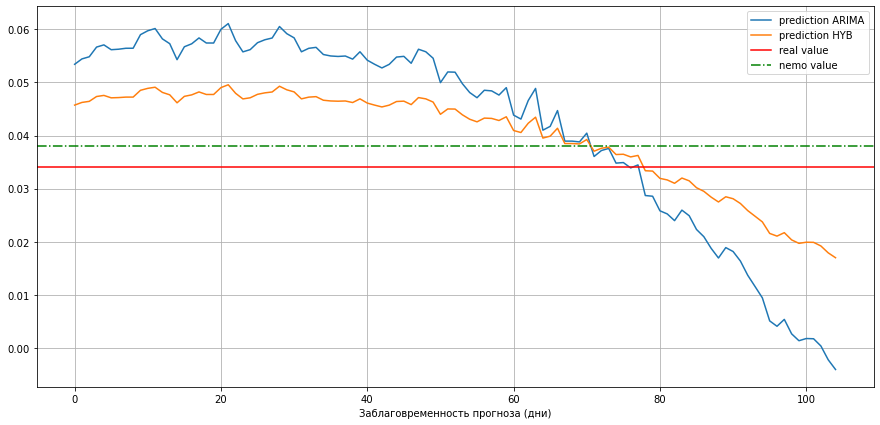

Test cell № 76


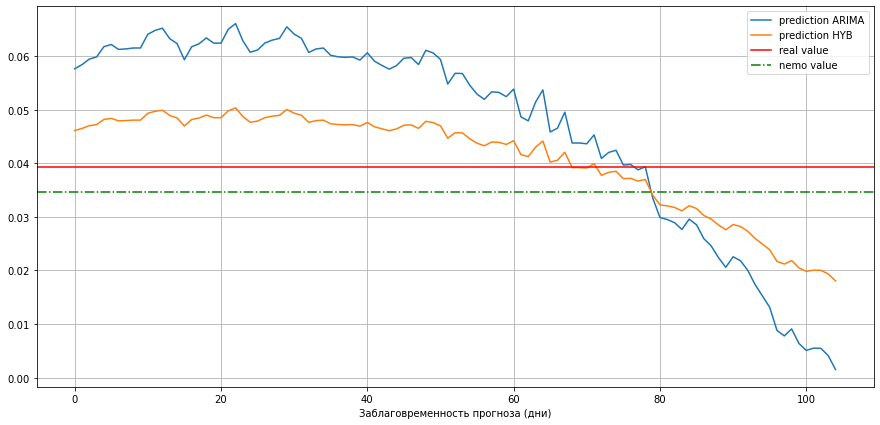

Test cell № 77


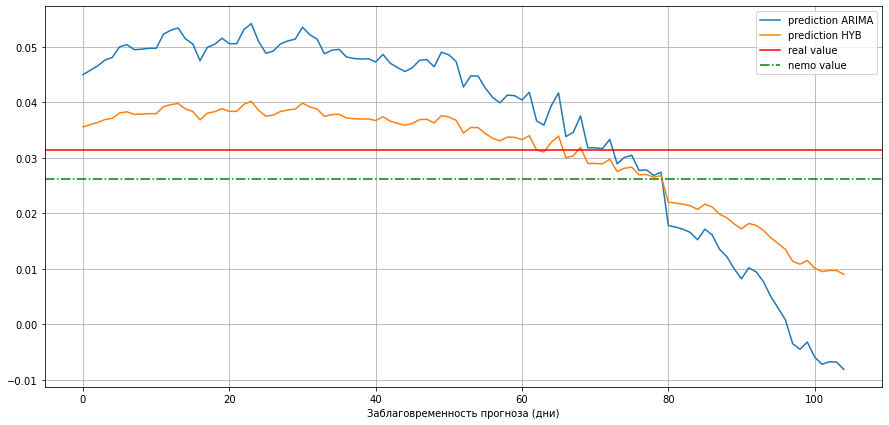

Test cell № 78


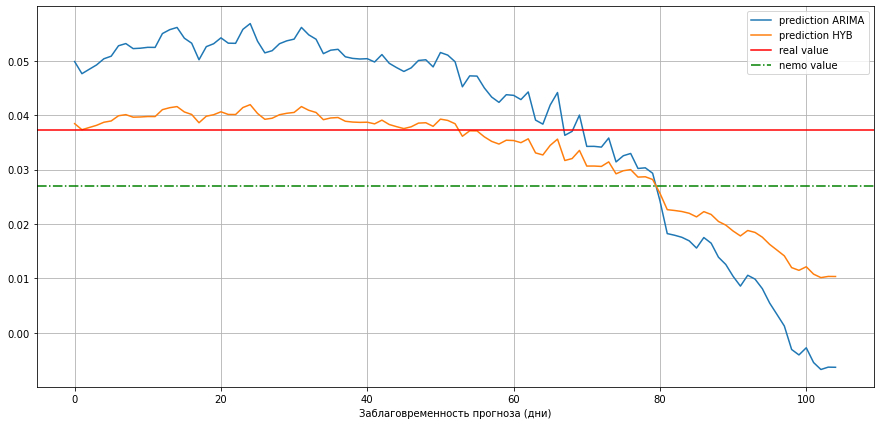

Test cell № 79


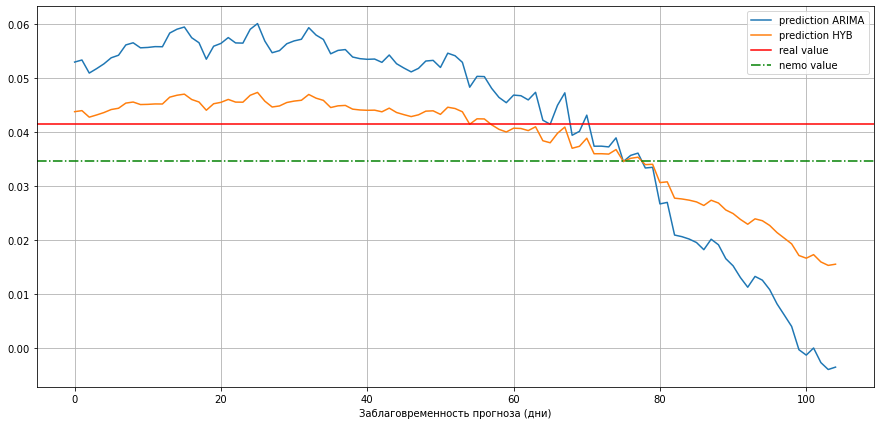

Test cell № 80


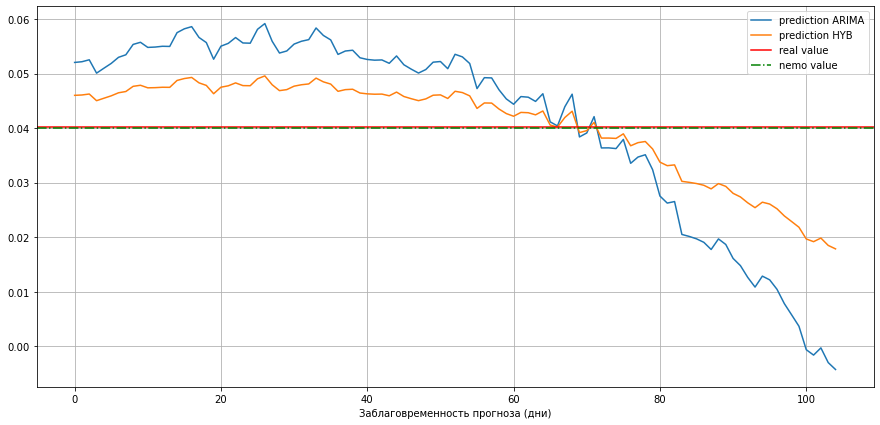

Test cell № 81


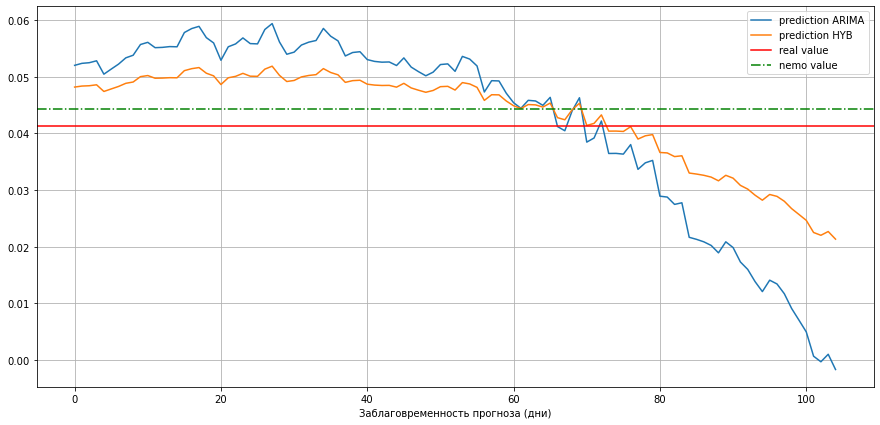

Test cell № 82


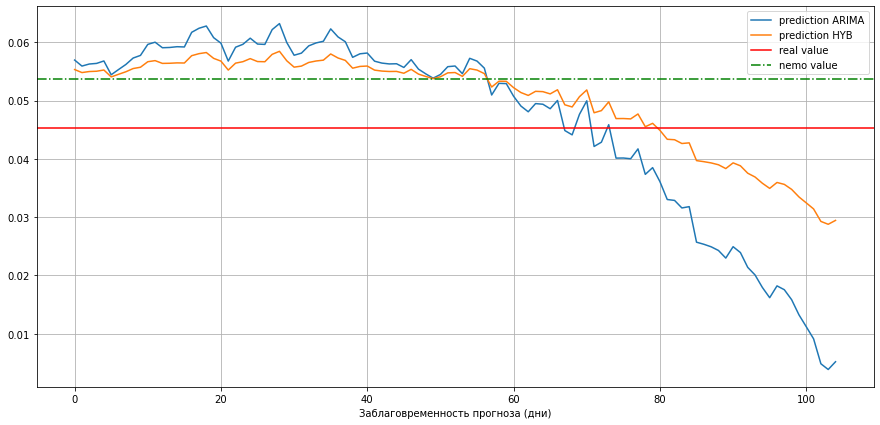

Test cell № 83


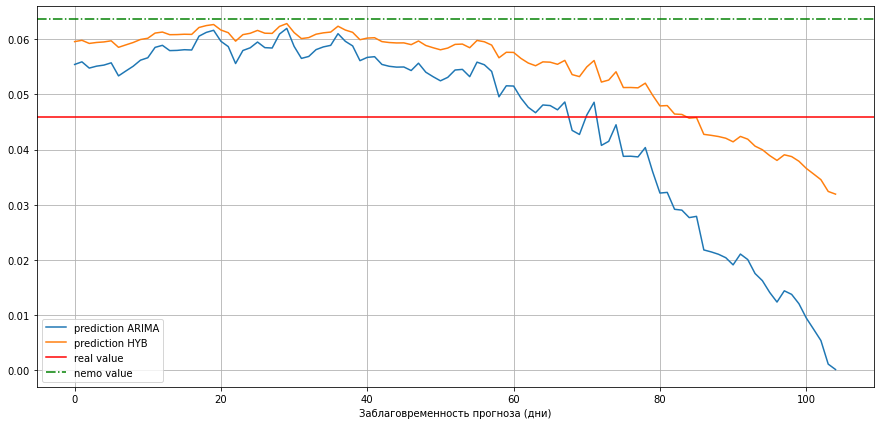

Test cell № 84


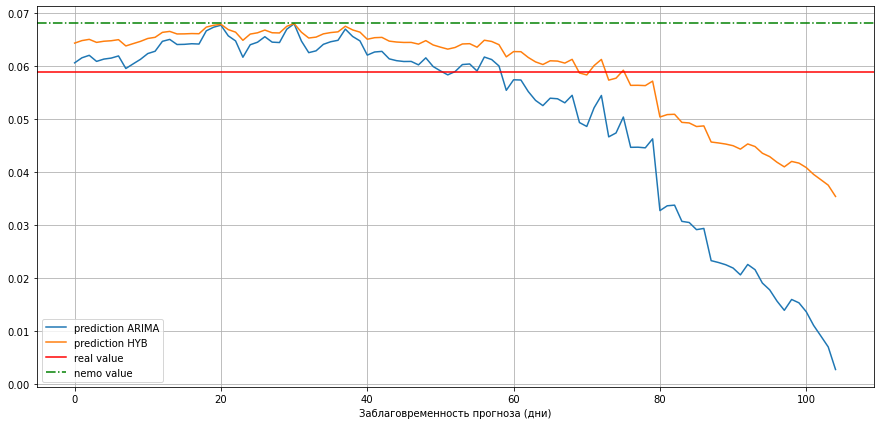

Test cell № 85


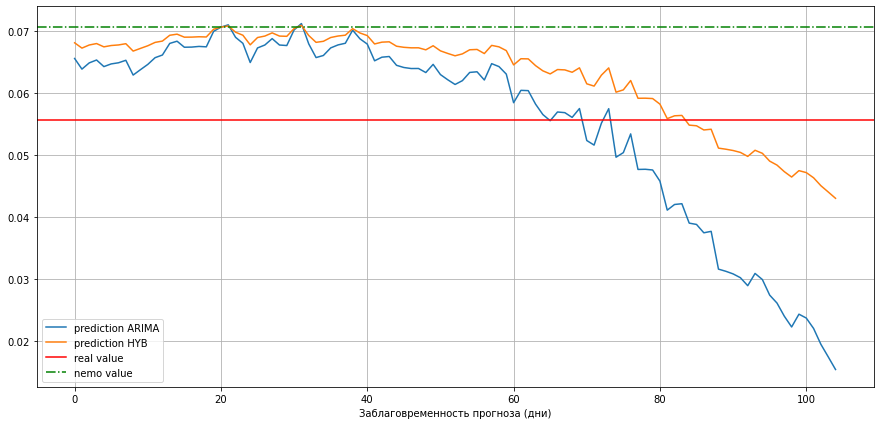

Test cell № 86


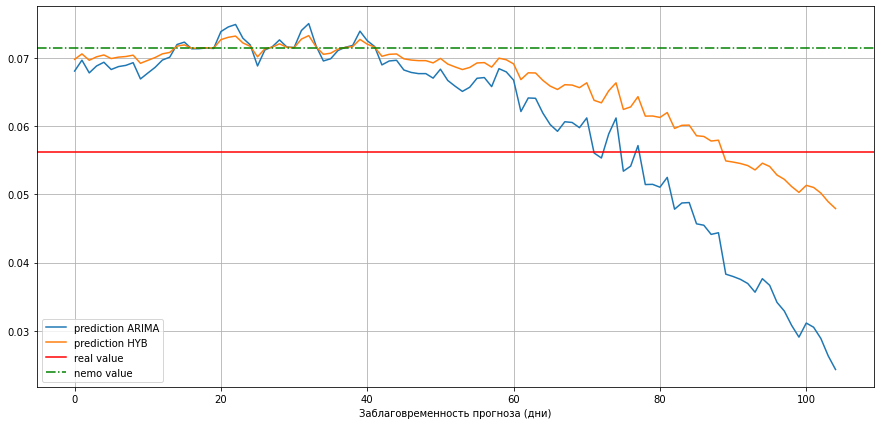

Test cell № 87


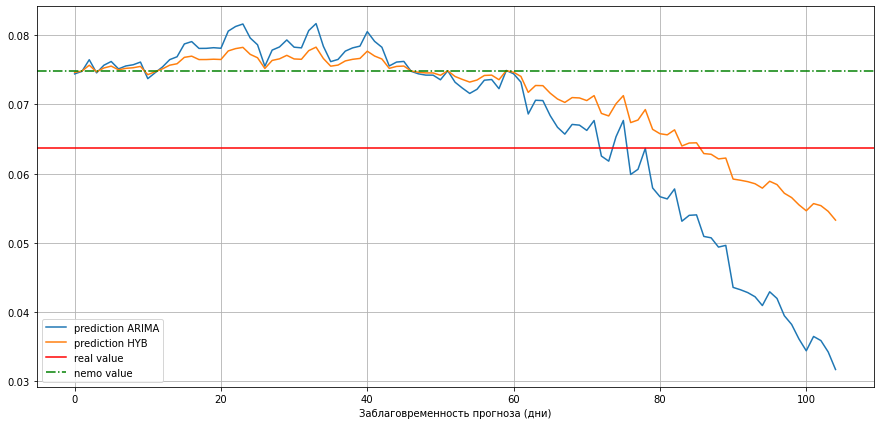

Test cell № 88


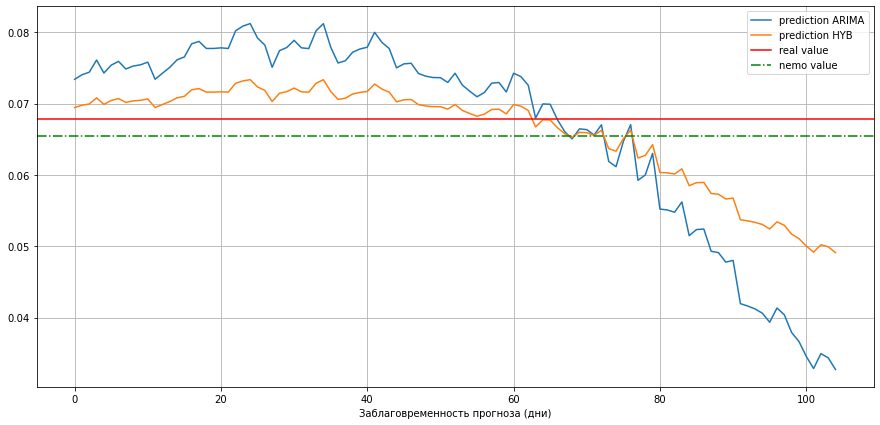

Test cell № 89


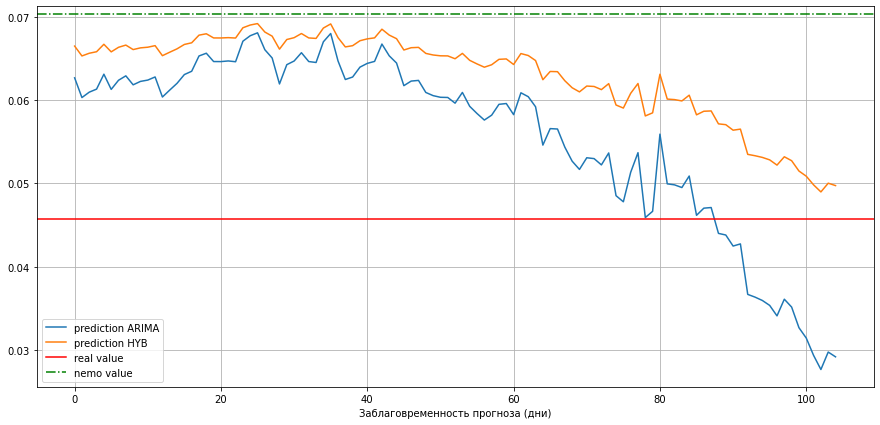

Test cell № 90


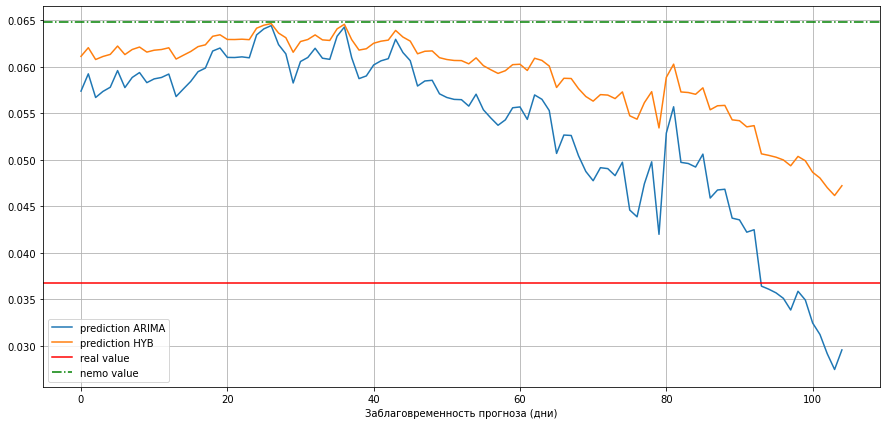

Test cell № 91


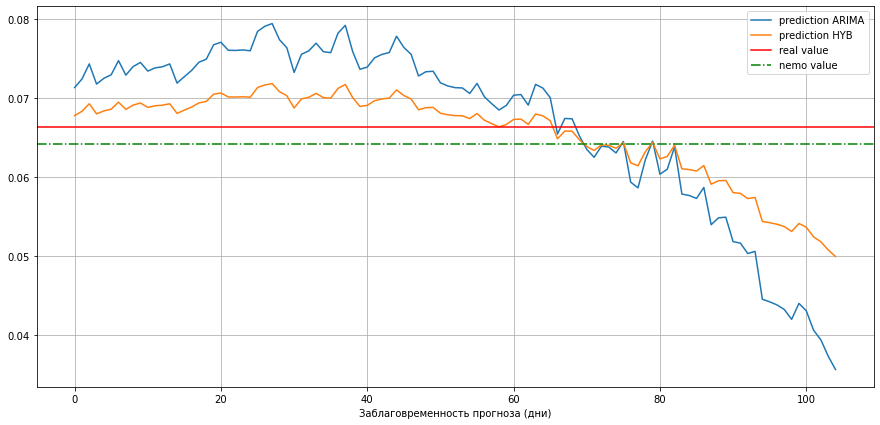

Test cell № 92


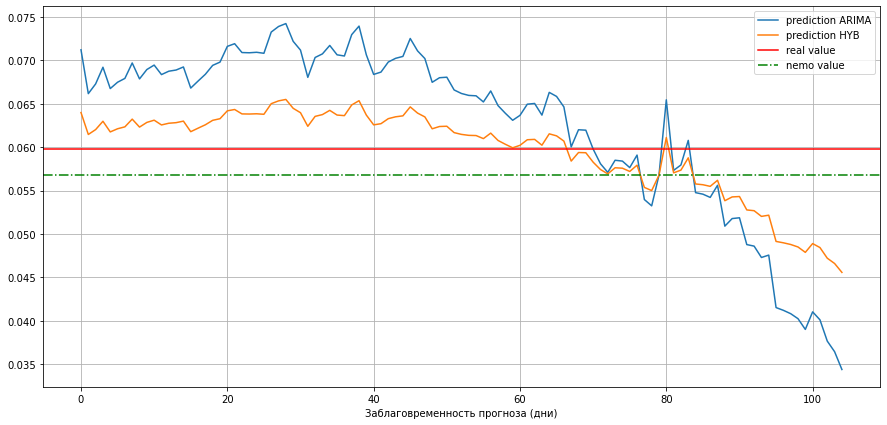

Test cell № 93


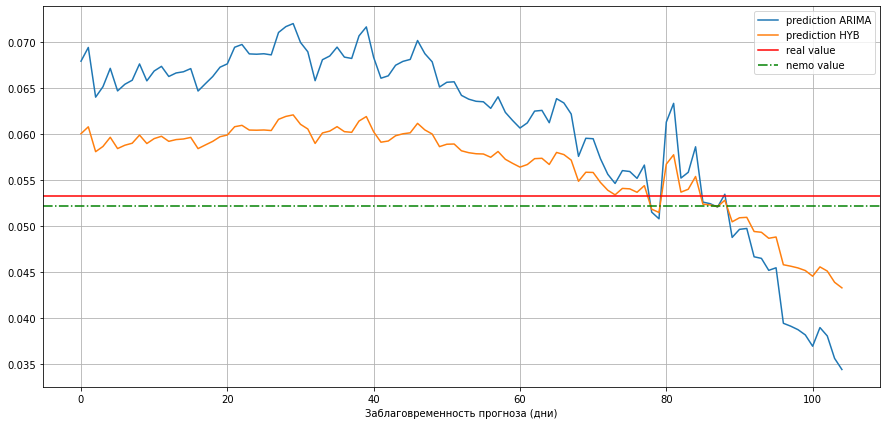

Test cell № 94


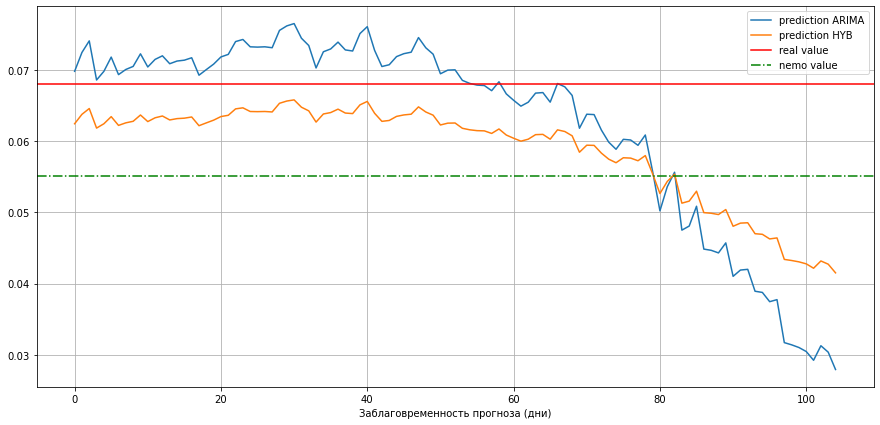

Test cell № 95


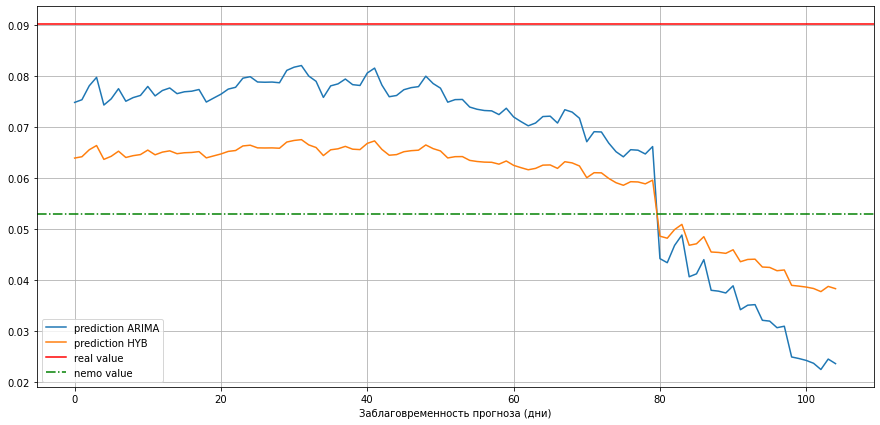

Test cell № 96


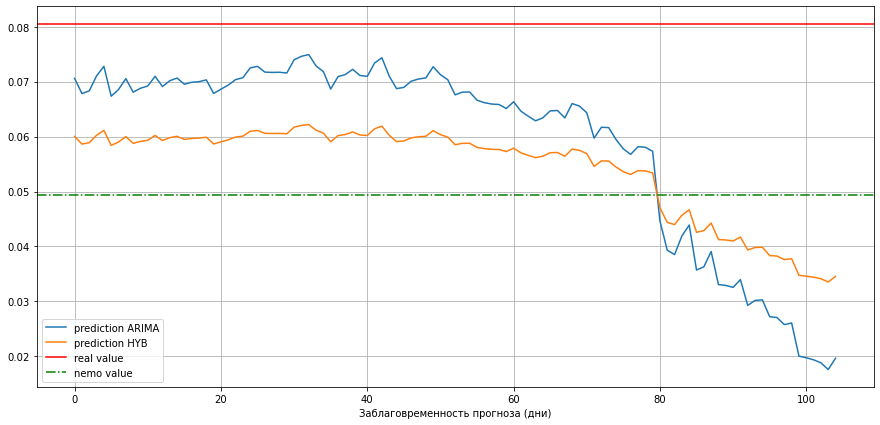

Test cell № 97


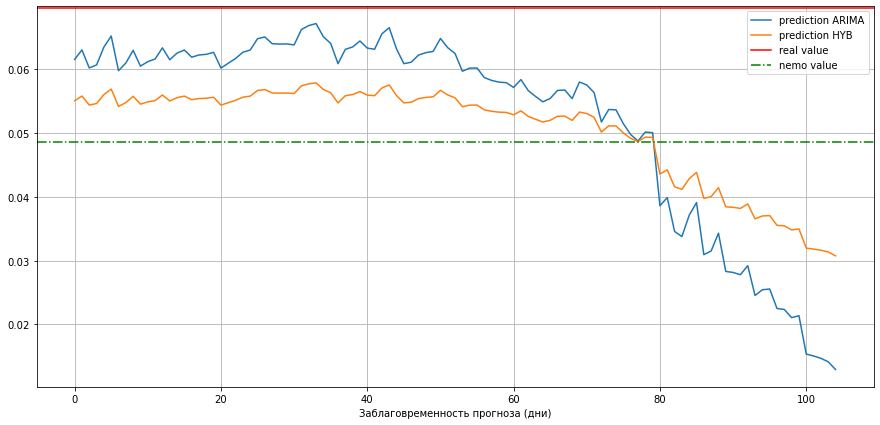

Test cell № 98


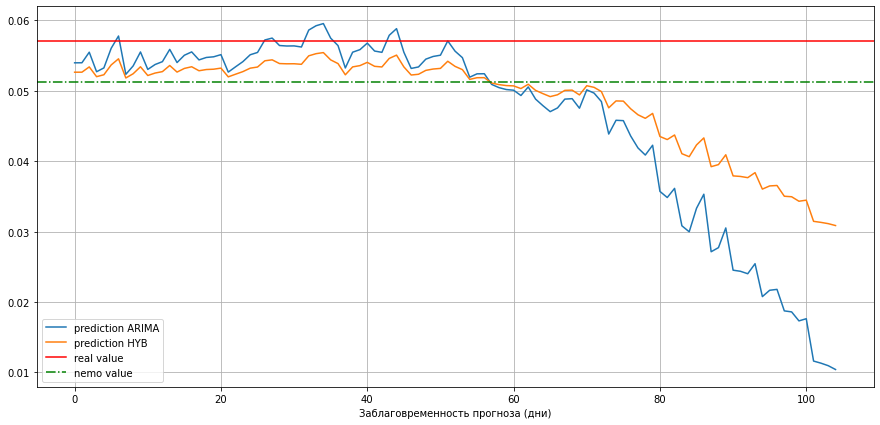

Test cell № 99


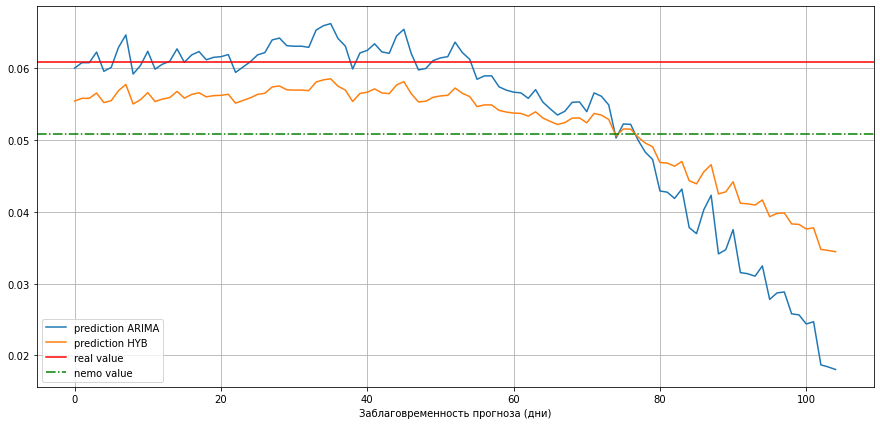

Test cell № 100


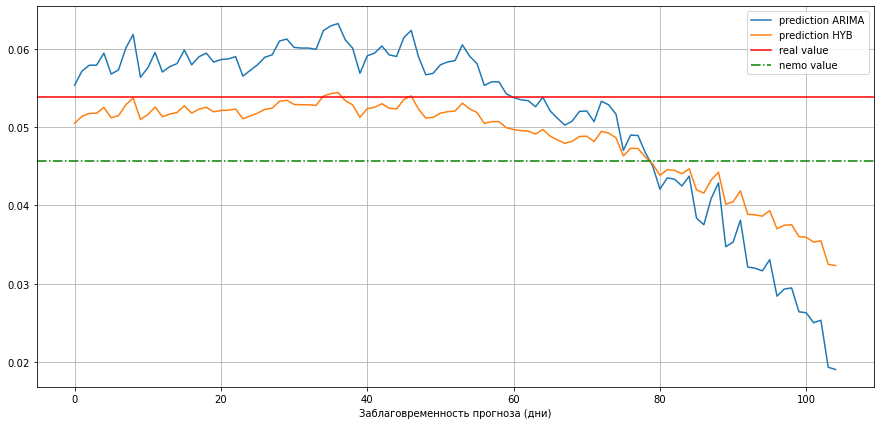

Test cell № 101


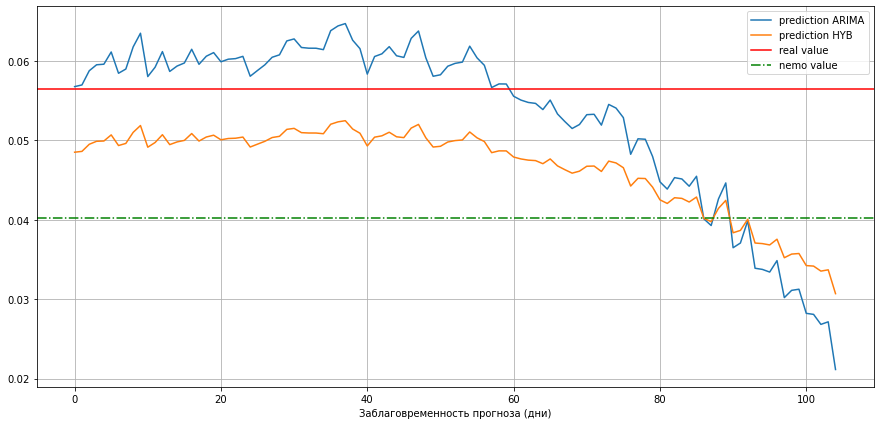

Test cell № 102


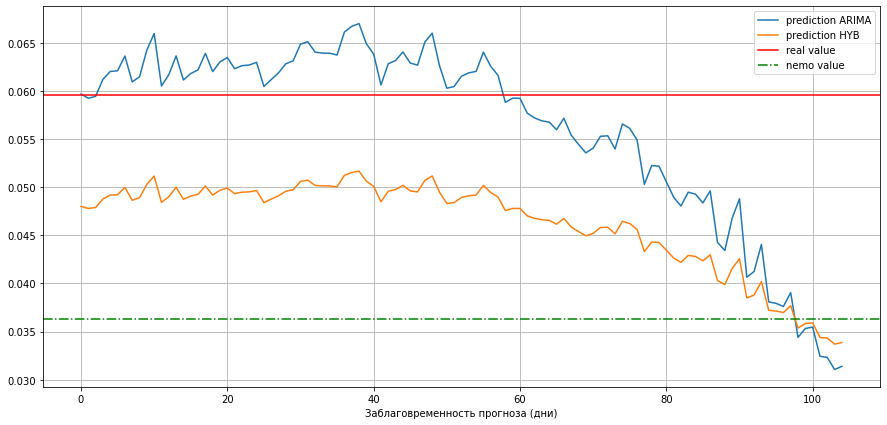

Test cell № 103


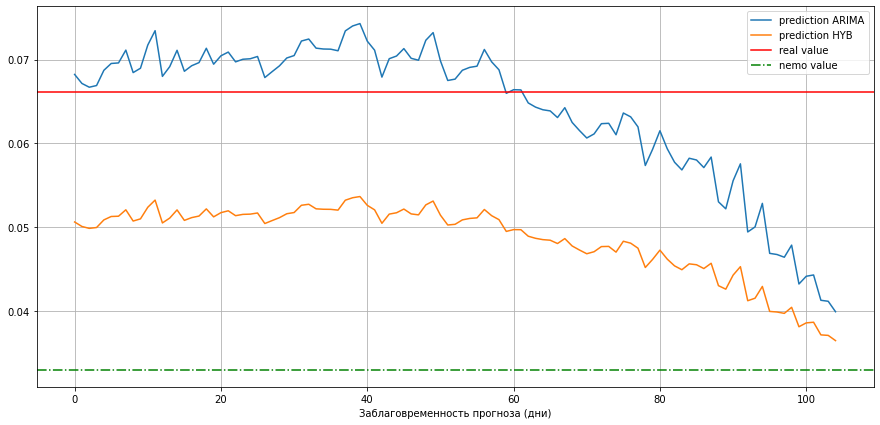

Test cell № 104


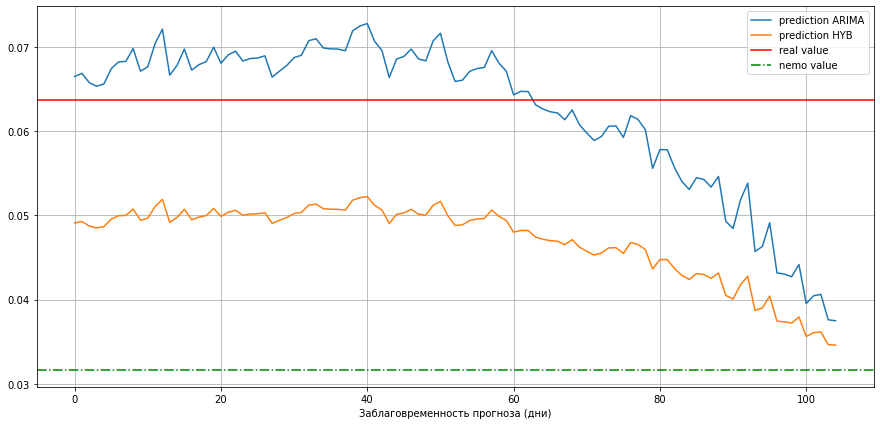

In [13]:
forc_n=105
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':
        print(column)
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forc_n:]
        test.index = df_rean['dates'][-forc_n:]
        data = df_rean[column][:-forc_n]
        data.index = df_rean['dates'][:-forc_n]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forc_n:]
        nemo_pr.index = df_nemo['dates'][-forc_n:]
        
        ARIMA_MSE_errors_list=[]
        ARIMA_MAE_errors_list=[]
        ARIMA_MAPE_errors_list=[]
        ARIMA_R2_errors_list=[]
        
        HYB_MSE_errors_list=[]
        HYB_MAE_errors_list=[]
        HYB_MAPE_errors_list=[]
        HYB_R2_errors_list=[]
        
        for j in range (forc_n): # для каждой ячейки из test
            #print(j)
            predictions_list=[]
            for i in range (forc_n): # для каждой из заблаговременностей
                data = df_rean[column][:-forc_n+j-i] # выделяем обучающую выборку
                f_size = i+1 # величина предсказания
                
                stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
                model_res = stlf.fit()
                forecasts_i = model_res.forecast(f_size).tolist()[-1] # делаем предсказание и берем последнее значение
                predictions_list.append(forecasts_i)# добавляем предсказание в список предсказаний со всеми заблаговременостями
            
            real_val_list=np.full(forc_n, test[j]) # создаем массив верных значений
            nemo_real_val_list=np.full(forc_n, nemo_pr[j]) # создаем массив верных значений по NEMO
            
            HYB_pr=(predictions_list+nemo_real_val_list)/2 # добавляем к списку предсказаний значение NEMO и усредняем            
            
            
            # считаем ошибки как отклонения от реального значения
            ARIMA_MSE_errors_list.append(mean_squared_error(real_val_list, predictions_list))
            ARIMA_MAE_errors_list.append(mean_absolute_error(real_val_list, predictions_list))
            ARIMA_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-predictions_list)/real_val_list)*100,3))
            ARIMA_R2_errors_list.append(r2_score(real_val_list, predictions_list))
            
            HYB_MSE_errors_list.append(mean_squared_error(real_val_list, HYB_pr))
            HYB_MAE_errors_list.append(mean_absolute_error(real_val_list, HYB_pr))
            HYB_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-HYB_pr)/real_val_list)*100,3))
            HYB_R2_errors_list.append(r2_score(real_val_list, HYB_pr))
            
            
            print('Test cell № %s'%str(j))
            plt.plot(np.arange(len(predictions_list)), predictions_list, label='prediction ARIMA')
            plt.plot(np.arange(len(HYB_pr)), HYB_pr, label='prediction HYB')
            plt.axhline(y=test[j], color='r', linestyle='-', label='real value')
            plt.axhline(y=nemo_pr[j], color='green', linestyle='-.', label='nemo value')
            plt.xlabel("Заблаговременность прогноза (дни)")
            plt.legend()
            plt.grid()
            plt.show()
        break